# Customer Retention Analysis 

### Read in the data and take a peek

In [49]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('dummy_customer_file.csv')

# Display the first few rows to verify the data loaded correctly
print(df.head())



               oid provider  total_charges signup_date is_canceled is_active  \
0  273624174263463    apple          10.94  2021-04-20        True     False   
1  532534633483904    apple          10.92  2021-04-20        True     False   
2  623527156674739    apple           0.00  2021-04-20       False     False   
3  441616357320658    apple          90.30  2021-04-20       False      True   
4  189644194376891    apple          79.98  2021-04-20       False      True   

  is_delinquent conversion_date              cancellation_date  current_mrr  \
0         False      2021-04-20  2021-05-20T12:00:00.000+00:00         0.00   
1         False      2021-04-20  2021-06-20T12:00:00.000+00:00         0.00   
2         False             NaN                            NaN         0.00   
3         False      2021-04-27                            NaN         3.47   
4         False      2021-05-04                            NaN         3.33   

                            personal_person_

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/3664610906.py:4: DtypeWarning: Columns (4,5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dummy_customer_file.csv')


In [50]:
# Basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134612 entries, 0 to 134611
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   oid                          134610 non-null  object 
 1   provider                     134610 non-null  object 
 2   total_charges                134610 non-null  float64
 3   signup_date                  134610 non-null  object 
 4   is_canceled                  134610 non-null  object 
 5   is_active                    134610 non-null  object 
 6   is_delinquent                134610 non-null  object 
 7   conversion_date              80759 non-null   object 
 8   cancellation_date            33518 non-null   object 
 9   current_mrr                  134610 non-null  float64
 10  personal_person_geo_country  105503 non-null  object 
 11  converted                    134610 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1

### Look and clean up NaN values
- Clean up only the rows where all columns are null

In [51]:
# Check for any remaining missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
oid                                 2
provider                            2
total_charges                       2
signup_date                         2
is_canceled                         2
is_active                           2
is_delinquent                       2
conversion_date                 53853
cancellation_date              101094
current_mrr                         2
personal_person_geo_country     29109
converted                           2
dtype: int64


In [52]:
#Look at rows where oid is invalid, entire row shows up invalid
#null_rows = df[df.isnull().any(axis=1)]
null_rows = df[df['oid'].isnull()]
print("\nRows with missing values:")
print(null_rows)


Rows with missing values:
        oid provider  total_charges signup_date is_canceled is_active  \
134610  NaN      NaN            NaN         NaN         NaN       NaN   
134611  NaN      NaN            NaN         NaN         NaN       NaN   

       is_delinquent conversion_date cancellation_date  current_mrr  \
134610           NaN             NaN               NaN          NaN   
134611           NaN             NaN               NaN          NaN   

       personal_person_geo_country converted  
134610                         NaN       NaN  
134611                         NaN       NaN  


In [53]:
#Remove the 2 rows that are completely invalid, bad data sourcing 
# Drop rows where 'oid' is null, keep all columns
df2 = df.copy()

df2 = df2.dropna(subset=['oid'])

# Optional: verify the change
print(f"Original DataFrame shape: {df.shape}")

Original DataFrame shape: (134612, 12)


### Now lets make all the date time columns converted to make easier
- Also removed the uniform timestamp to simplify 

In [1]:
# Convert date columns to proper datetime format, ditch the timestamp on cancellation date
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['conversion_date'] = pd.to_datetime(df2['conversion_date'])
df2['cancellation_date'] = pd.to_datetime(df2['cancellation_date'])
df2['cancellation_date'] = df2['cancellation_date'].dt.date
df2['cancellation_date'] = pd.to_datetime(df2['cancellation_date'])


NameError: name 'pd' is not defined

In [55]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Don't wrap long strings
pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Now print your value counts
print(df2['personal_person_geo_country'].value_counts())
print(df2['personal_person_geo_country'].nunique())

# Optional: Reset to defaults after viewing
pd.reset_option('display.max_rows')

personal_person_geo_country
United States of America                                39021
United Kingdom of Great Britain and Northern Ireland     8541
Germany                                                  8362
France                                                   4301
Canada                                                   4018
Italy                                                    3126
Australia                                                3105
Russian Federation                                       3048
Japan                                                    2166
Switzerland                                              1653
Netherlands                                              1607
Spain                                                    1531
China                                                    1482
Sweden                                                   1259
United States                                            1206
Brazil                                    

In [56]:


# Create a mapping of non-standard country names to their standardized versions
# Using the more popular version of each country name
country_mapping = {
    'United States': 'United States of America',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Russia': 'Russian Federation',
    'Turkey': 'Türkiye',  # Note: Here 'Turkey' is more popular, but 'Türkiye' is the official name now
    'Vietnam': 'Viet Nam',
    'Taiwan': 'Taiwan, Province of China',
    'Bolivia': 'Bolivia (Plurinational State of)',
    'Venezuela': 'Venezuela (Bolivarian Republic of)',
    'Macedonia (FYROM)': 'North Macedonia',
    'Bahamas': 'The Bahamas',
    'South Korea': 'Korea (Republic of)'
}

# Apply the mapping to standardize country names
df2['personal_person_geo_country'] = df2['personal_person_geo_country'].replace(country_mapping)
df2['personal_person_geo_country'].nunique()



160

## Now lets go on to do some more investigation 

In [ ]:
df3 = df2.copy()


# Basic statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df3[['total_charges', 'current_mrr']].describe())




Summary statistics for numerical columns:
       total_charges    current_mrr
count  134610.000000  134610.000000
mean       24.859945       2.081608
std        31.305221       3.042637
min      -119.980000       0.000000
25%         0.000000       0.000000
50%         8.410000       0.000000
75%        54.990000       5.000000
max       293.580000      23.140000


In [77]:
# Create mask for active, non-canceled customers
active_mask = (df3['is_active'].fillna(False) & ~df3['is_canceled'].fillna(False))

# Print summary statistics for filtered customers
print("Summary statistics for active, non-canceled customers:")
print(df3[active_mask][['total_charges', 'current_mrr']].describe())

# Add context about the filtering
active_count = active_mask.sum()
total_count = len(df3)
print(f"\nBased on {active_count:,} active, non-canceled customers out of {total_count:,} total customers")
print(f"Active, non-canceled customer percentage: {(active_count/total_count)*100:.2f}%")

Summary statistics for active, non-canceled customers:
       total_charges   current_mrr
count   47069.000000  47069.000000
mean       53.647493      5.953074
std        30.405567      1.851527
min       -59.990000      0.210000
25%        29.370000      5.000000
50%        59.990000      5.120000
75%        63.460000      7.990000
max       293.580000     23.140000

Based on 47,069 active, non-canceled customers out of 134,610 total customers
Active, non-canceled customer percentage: 34.97%


/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/342521681.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  active_mask = (df3['is_active'].fillna(False) & ~df3['is_canceled'].fillna(False))


<Figure size 1400x800 with 0 Axes>

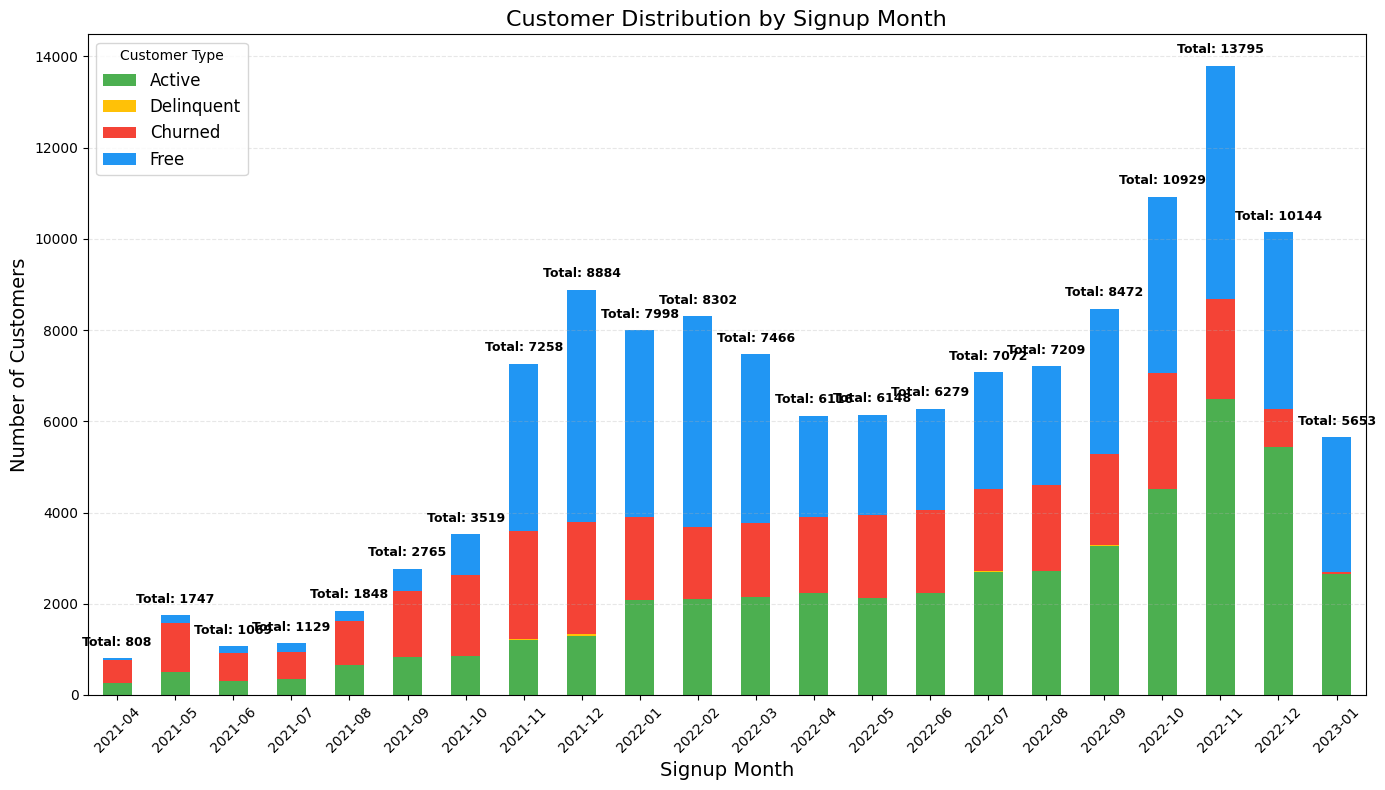

<Figure size 1400x800 with 0 Axes>

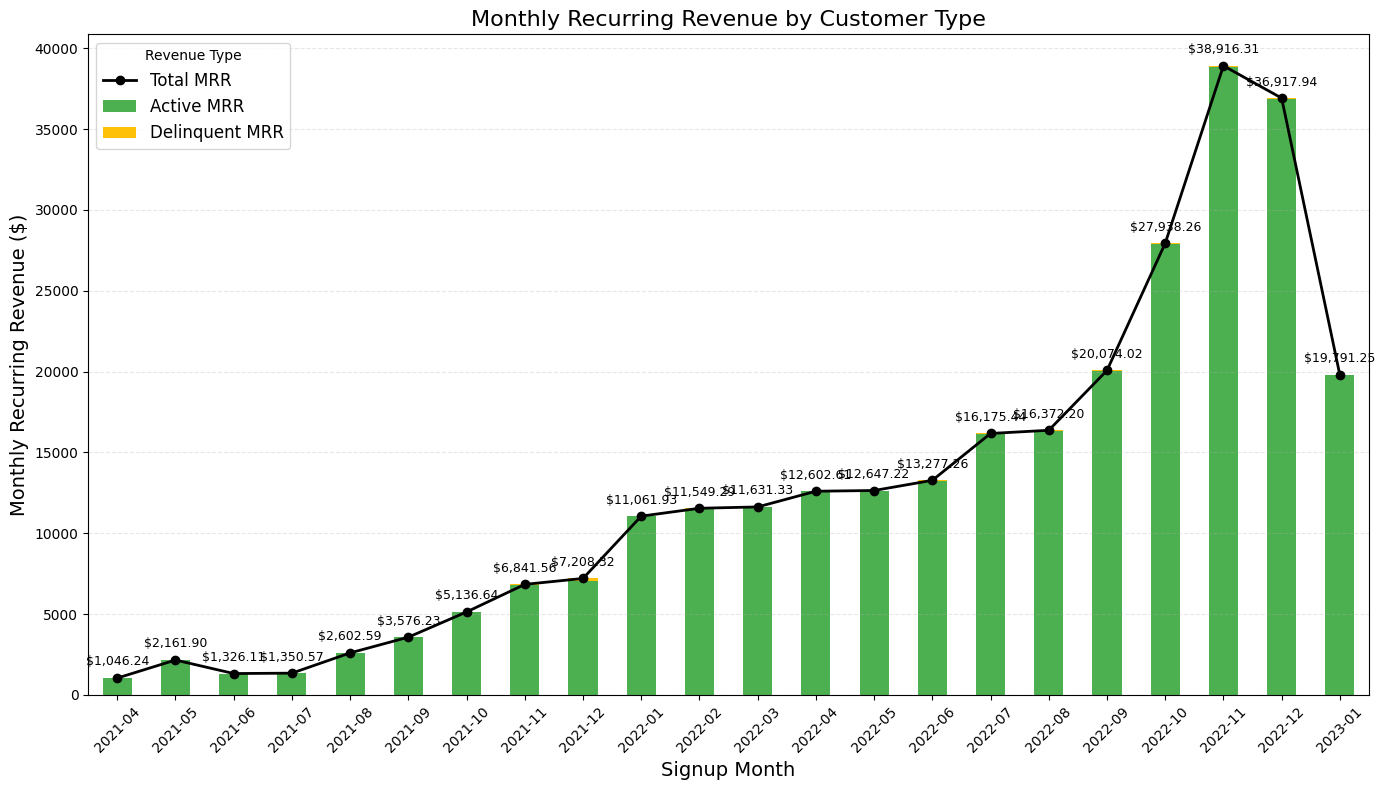

In [108]:
# Create customer type analysis graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a copy of df3 to work with
df_analysis = df3.copy()

# Extract signup month for grouping
df_analysis['signup_month'] = df_analysis['signup_date'].dt.to_period('M')

# Create binary columns for the customer categories
df_analysis['is_active_binary'] = df_analysis['is_active'].astype(str) == 'True'
df_analysis['is_delinquent_binary'] = df_analysis['is_delinquent'].astype(str) == 'True'
df_analysis['is_canceled_binary'] = df_analysis['is_canceled'].astype(str) == 'True'
df_analysis['is_converted_binary'] = df_analysis['converted'].astype(str) == 'True'

# Define customer categories (mutually exclusive)
# Active (base) customers: active but not delinquent
df_analysis['is_active_base'] = df_analysis['is_active_binary'] & ~df_analysis['is_delinquent_binary']

# Delinquent customers: active and delinquent
df_analysis['is_delinquent_only'] = df_analysis['is_active_binary'] & df_analysis['is_delinquent_binary']

# Churned customers: have a cancellation date
df_analysis['is_churned'] = df_analysis['is_canceled_binary']

# Free customers: not active, not canceled
df_analysis['is_free'] = ~df_analysis['is_active_binary'] & ~df_analysis['is_canceled_binary']

# Group by signup month and count customers in each category
monthly_active = df_analysis.groupby('signup_month')['is_active_base'].sum()
monthly_delinquent = df_analysis.groupby('signup_month')['is_delinquent_only'].sum()
monthly_churned = df_analysis.groupby('signup_month')['is_churned'].sum()
monthly_free = df_analysis.groupby('signup_month')['is_free'].sum()
monthly_total = df_analysis.groupby('signup_month').size()

# Create a DataFrame with all categories
monthly_data = pd.DataFrame({
    'Active': monthly_active,
    'Delinquent': monthly_delinquent,
    'Churned': monthly_churned,
    'Free': monthly_free,
    'Total': monthly_total
})

# Plot the first graph - stacked bar chart of customer types by signup month
plt.figure(figsize=(14, 8))
ax = monthly_data[['Active', 'Delinquent', 'Churned', 'Free']].plot(
    kind='bar', stacked=True, figsize=(14, 8),
    color=['#4CAF50', '#FFC107', '#F44336', '#2196F3'])  # Green, Yellow, Red, Blue

plt.title('Customer Distribution by Signup Month', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title='Customer Type', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add total value labels
for i, total in enumerate(monthly_data['Total']):
    ax.text(i, total + monthly_total.max()*0.02, f'Total: {int(total)}', 
            ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# For the second graph, let's track MRR by customer status over time
# Calculate total MRR by month and customer type
mrr_by_type = pd.DataFrame(index=monthly_data.index)

# Calculate MRR for each customer type
mrr_by_type['Active MRR'] = df_analysis[df_analysis['is_active_base']].groupby('signup_month')['current_mrr'].sum()
mrr_by_type['Delinquent MRR'] = df_analysis[df_analysis['is_delinquent_only']].groupby('signup_month')['current_mrr'].sum()
mrr_by_type['Total MRR'] = df_analysis.groupby('signup_month')['current_mrr'].sum()

# Fill NaN values with 0
mrr_by_type = mrr_by_type.fillna(0)

# Plot the second graph - MRR by customer type over time
plt.figure(figsize=(14, 8))

# Plot bars for active and delinquent MRR
ax = mrr_by_type[['Active MRR', 'Delinquent MRR']].plot(
    kind='bar', stacked=True, figsize=(14, 8),
    color=['#4CAF50', '#FFC107'])  # Green, Yellow

# Plot line for total MRR
plt.plot(range(len(mrr_by_type)), mrr_by_type['Total MRR'], 
         marker='o', color='black', linewidth=2, label='Total MRR')

plt.title('Monthly Recurring Revenue by Customer Type', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Monthly Recurring Revenue ($)', fontsize=14)
plt.legend(title='Revenue Type', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add total value labels
for i, mrr in enumerate(mrr_by_type['Total MRR']):
    if mrr > 0:
        plt.text(i, mrr + mrr_by_type['Total MRR'].max()*0.02, 
                f'${mrr:,.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

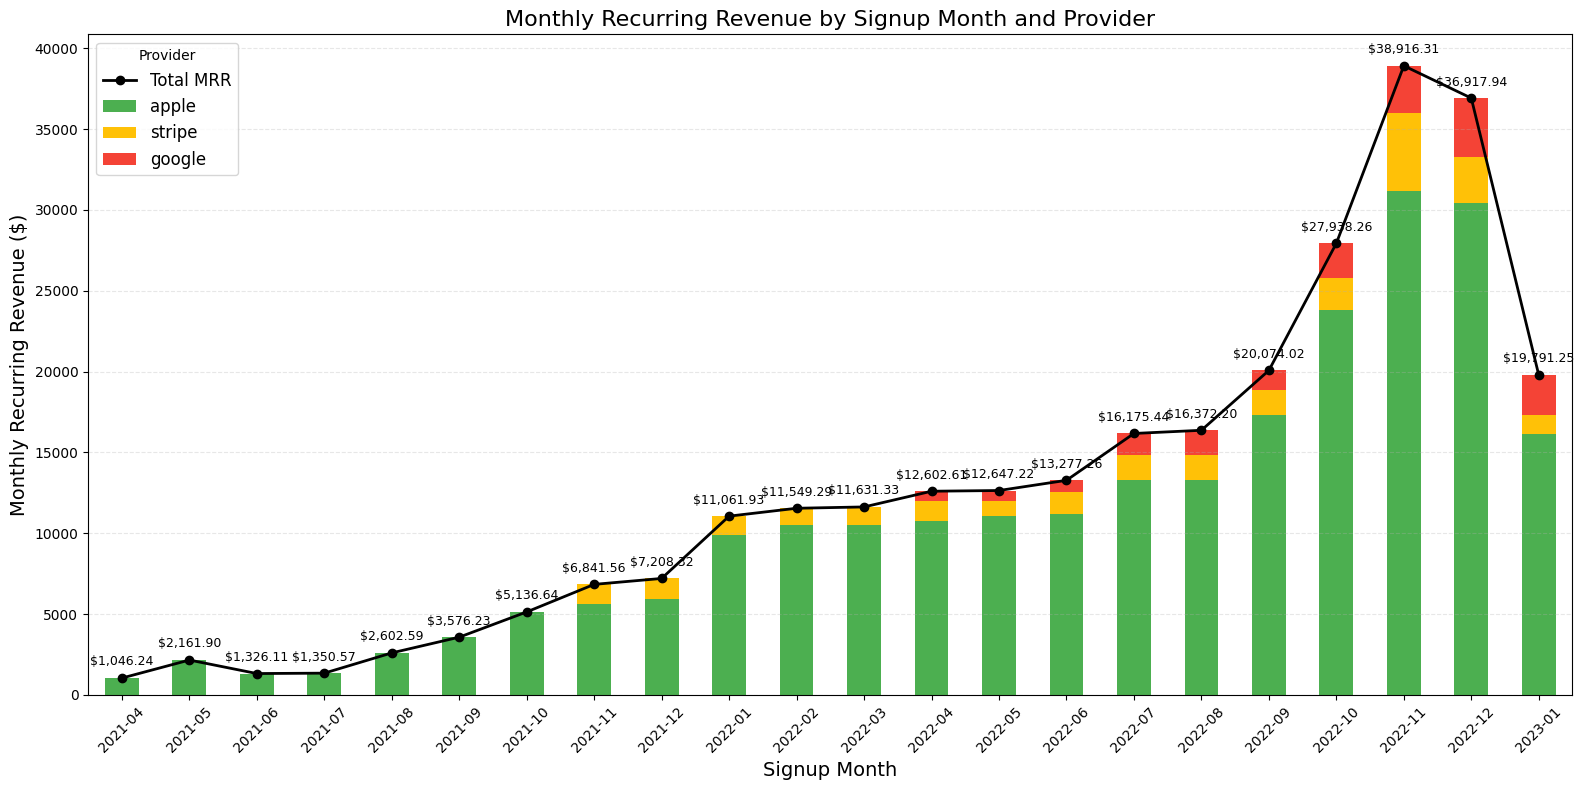

<Figure size 1600x800 with 0 Axes>

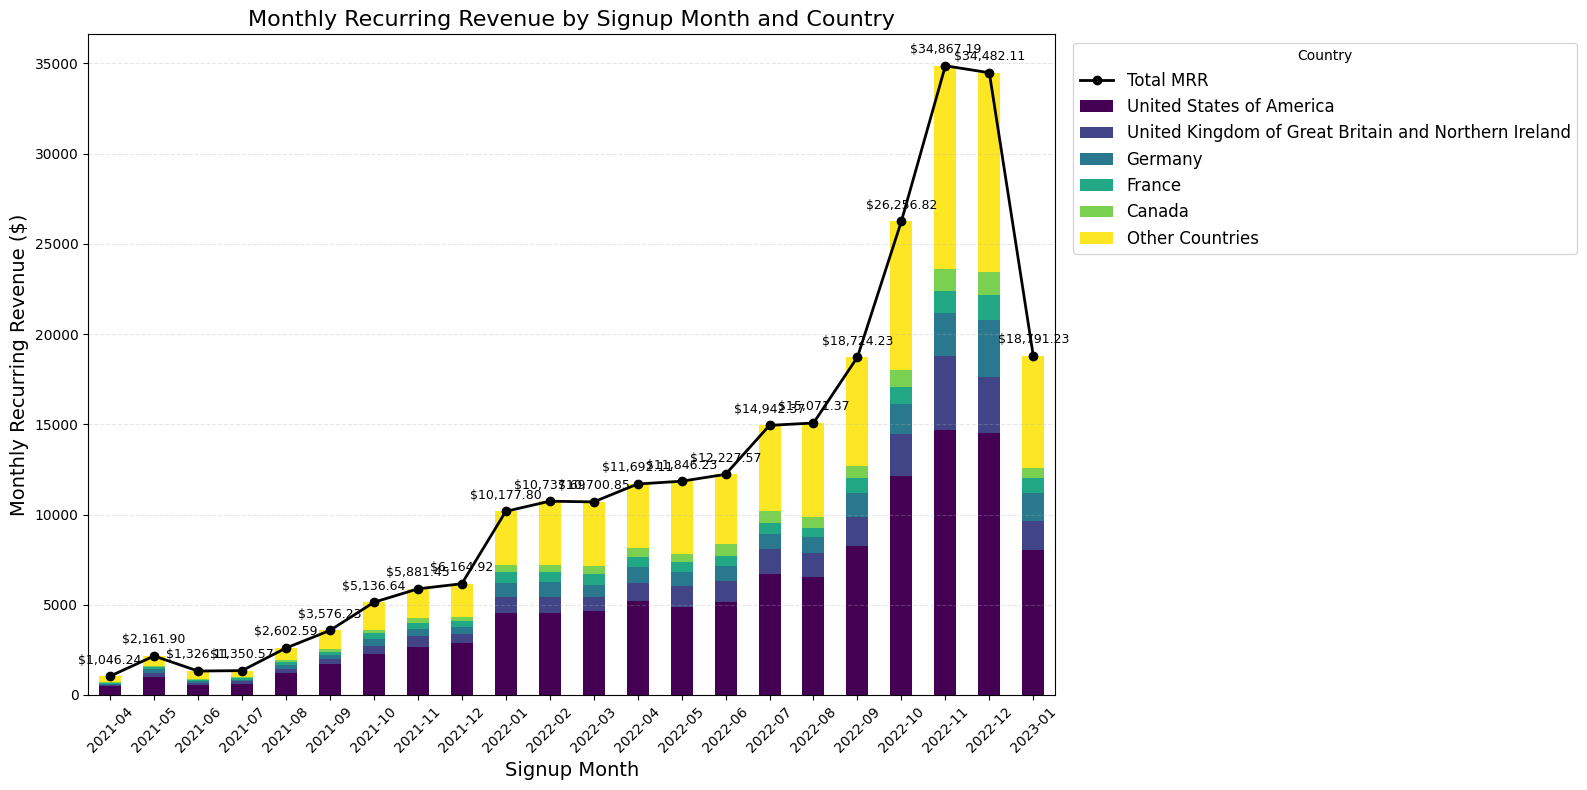

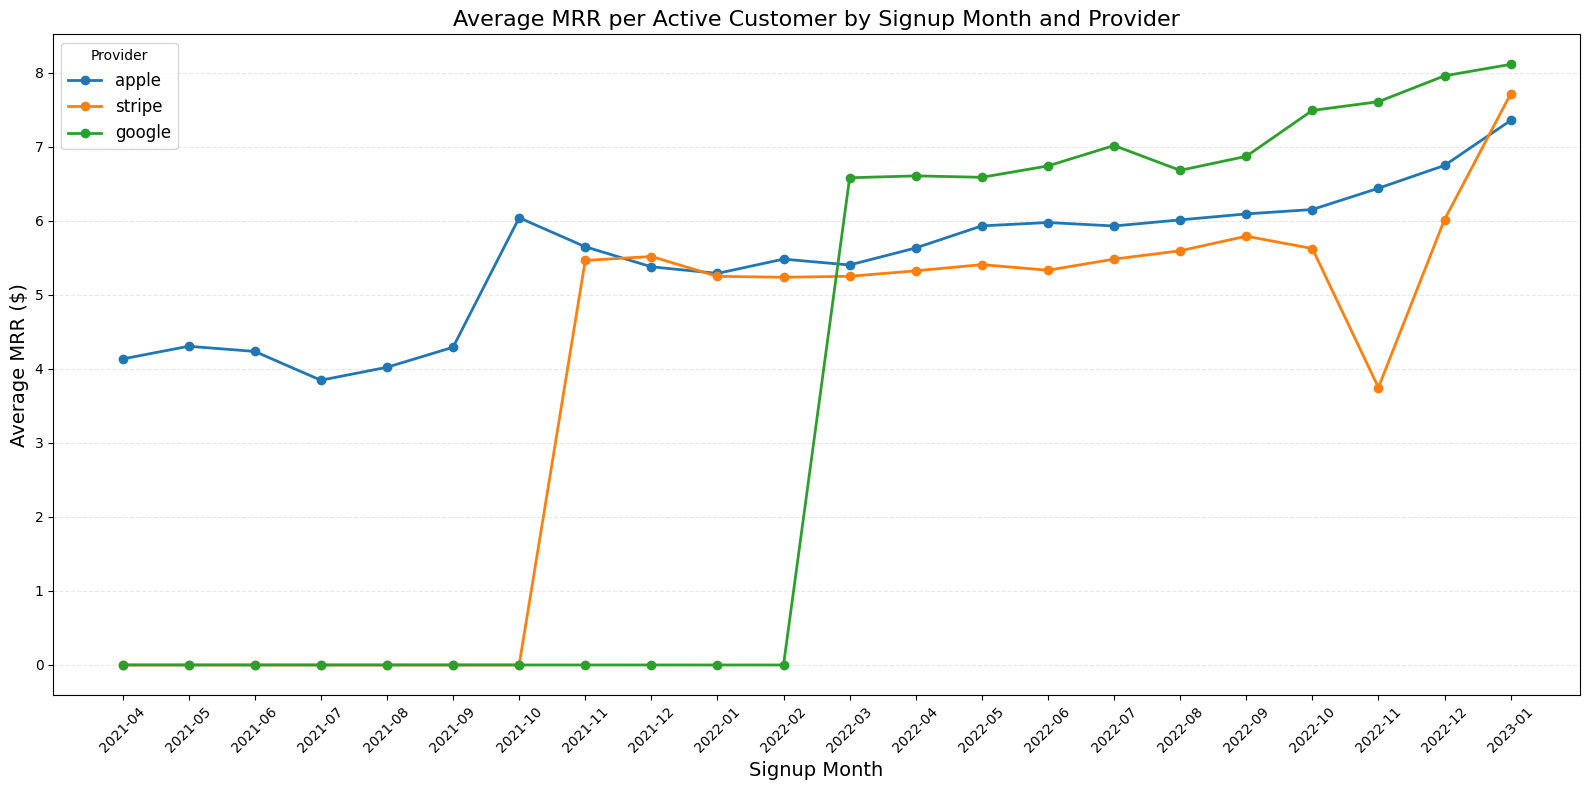

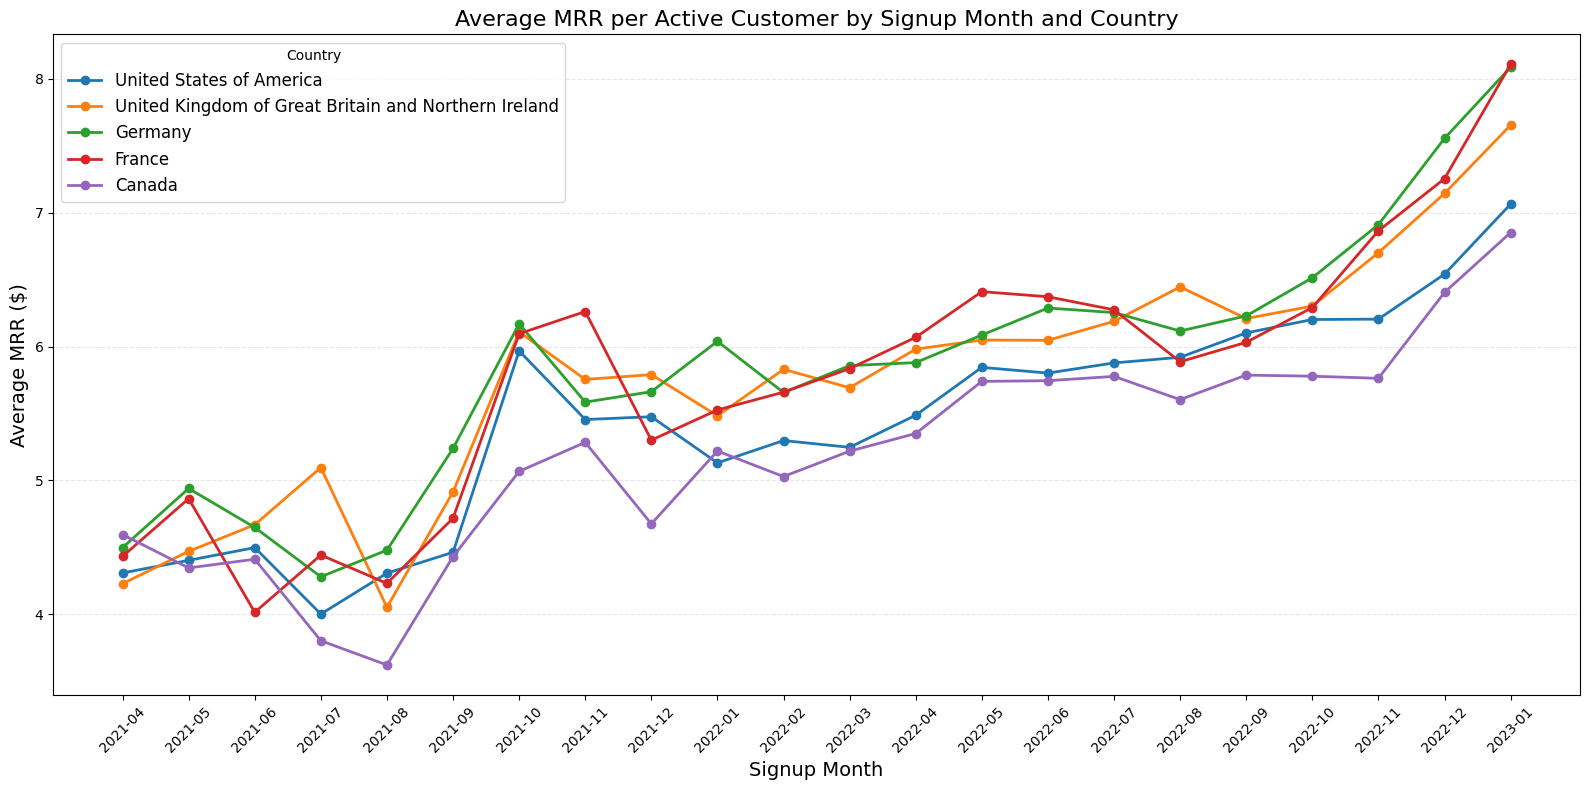

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [111]:
# Continue from the existing code with additional time-based graphs for provider and geography splits

# Graph 3: MRR by signup month, split by provider
plt.figure(figsize=(16, 8))

# Create empty DataFrame to store provider data by month
provider_mrr_by_month = pd.DataFrame(index=monthly_data.index)

# Calculate MRR by signup month for each provider
for provider in df_analysis['provider'].unique():
    provider_data = df_analysis[df_analysis['provider'] == provider]
    
    # Calculate total MRR by signup month for this provider
    provider_mrr = provider_data.groupby('signup_month')['current_mrr'].sum()
    provider_mrr_by_month[provider] = provider_mrr

# Fill NaN values with 0
provider_mrr_by_month = provider_mrr_by_month.fillna(0)

# Create a stacked bar chart for provider MRR by month
ax = provider_mrr_by_month.plot(
    kind='bar', stacked=True, figsize=(16, 8),
    color=['#4CAF50', '#FFC107', '#F44336'])  # Colors for each provider

# Add total line
provider_mrr_by_month['Total'] = provider_mrr_by_month.sum(axis=1)
plt.plot(range(len(provider_mrr_by_month)), provider_mrr_by_month['Total'], 
         marker='o', color='black', linewidth=2, label='Total MRR')

plt.title('Monthly Recurring Revenue by Signup Month and Provider', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Monthly Recurring Revenue ($)', fontsize=14)
plt.legend(title='Provider', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add total value labels
for i, mrr in enumerate(provider_mrr_by_month['Total']):
    if mrr > 0:
        plt.text(i, mrr + provider_mrr_by_month['Total'].max()*0.02, 
                f'${mrr:,.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Graph 4: MRR by signup month, split by top 5 countries
# Identify top 5 countries by total MRR
df_geo = df_analysis.dropna(subset=['personal_person_geo_country'])
country_totals = df_geo.groupby('personal_person_geo_country')['current_mrr'].sum().sort_values(ascending=False)
top_5_countries = country_totals.head(5).index.tolist()

# Create empty DataFrame to store country data by month
country_mrr_by_month = pd.DataFrame(index=monthly_data.index)

# Calculate MRR by signup month for each top country
for country in top_5_countries:
    country_data = df_geo[df_geo['personal_person_geo_country'] == country]
    
    # Calculate total MRR by signup month for this country
    country_mrr = country_data.groupby('signup_month')['current_mrr'].sum()
    country_mrr_by_month[country] = country_mrr

# Calculate "Other Countries" MRR
other_countries_data = df_geo[~df_geo['personal_person_geo_country'].isin(top_5_countries)]
other_countries_mrr = other_countries_data.groupby('signup_month')['current_mrr'].sum()
country_mrr_by_month['Other Countries'] = other_countries_mrr

# Fill NaN values with 0
country_mrr_by_month = country_mrr_by_month.fillna(0)

# Create a stacked bar chart for country MRR by month
plt.figure(figsize=(16, 8))
ax = country_mrr_by_month.plot(
    kind='bar', stacked=True, figsize=(16, 8),
    colormap='viridis')  # Use a colormap for multiple countries

# Add total line
country_mrr_by_month['Total'] = country_mrr_by_month.sum(axis=1)
plt.plot(range(len(country_mrr_by_month)), country_mrr_by_month['Total'], 
         marker='o', color='black', linewidth=2, label='Total MRR')

plt.title('Monthly Recurring Revenue by Signup Month and Country', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Monthly Recurring Revenue ($)', fontsize=14)
plt.legend(title='Country', fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add total value labels
for i, mrr in enumerate(country_mrr_by_month['Total']):
    if mrr > 0:
        plt.text(i, mrr + country_mrr_by_month['Total'].max()*0.02, 
                f'${mrr:,.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Graph 5: Average MRR per customer by signup month and provider
plt.figure(figsize=(16, 8))

# Create empty DataFrame for average MRR per customer
avg_mrr_by_provider_month = pd.DataFrame(index=monthly_data.index)

# Calculate average MRR per customer by signup month for each provider
for provider in df_analysis['provider'].unique():
    provider_data = df_analysis[df_analysis['provider'] == provider]
    
    # Calculate average MRR by signup month for active customers
    active_customers = provider_data[provider_data['is_active_base']]
    monthly_avg_mrr = active_customers.groupby('signup_month')['current_mrr'].mean()
    avg_mrr_by_provider_month[provider] = monthly_avg_mrr

# Fill NaN values with 0
avg_mrr_by_provider_month = avg_mrr_by_provider_month.fillna(0)

# Create line chart for average MRR by provider over time
for provider in df_analysis['provider'].unique():
    plt.plot(range(len(avg_mrr_by_provider_month)), 
             avg_mrr_by_provider_month[provider], 
             marker='o', linewidth=2, label=provider)

plt.title('Average MRR per Active Customer by Signup Month and Provider', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Average MRR ($)', fontsize=14)
plt.legend(title='Provider', fontsize=12)
plt.xticks(range(len(avg_mrr_by_provider_month)), avg_mrr_by_provider_month.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Graph 6: Average MRR per customer by signup month for top 5 countries
plt.figure(figsize=(16, 8))

# Create empty DataFrame for average MRR per customer
avg_mrr_by_country_month = pd.DataFrame(index=monthly_data.index)

# Calculate average MRR per customer by signup month for each top country
for country in top_5_countries:
    country_data = df_geo[df_geo['personal_person_geo_country'] == country]
    
    # Calculate average MRR by signup month for active customers
    active_customers = country_data[country_data['is_active_base']]
    monthly_avg_mrr = active_customers.groupby('signup_month')['current_mrr'].mean()
    avg_mrr_by_country_month[country] = monthly_avg_mrr

# Fill NaN values with 0
avg_mrr_by_country_month = avg_mrr_by_country_month.fillna(0)

# Create line chart for average MRR by country over time
for country in top_5_countries:
    plt.plot(range(len(avg_mrr_by_country_month)), 
             avg_mrr_by_country_month[country], 
             marker='o', linewidth=2, label=country)

plt.title('Average MRR per Active Customer by Signup Month and Country', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Average MRR ($)', fontsize=14)
plt.legend(title='Country', fontsize=12)
plt.xticks(range(len(avg_mrr_by_country_month)), avg_mrr_by_country_month.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Graph 7: Customer retention rates by provider
plt.figure(figsize=(16, 8))


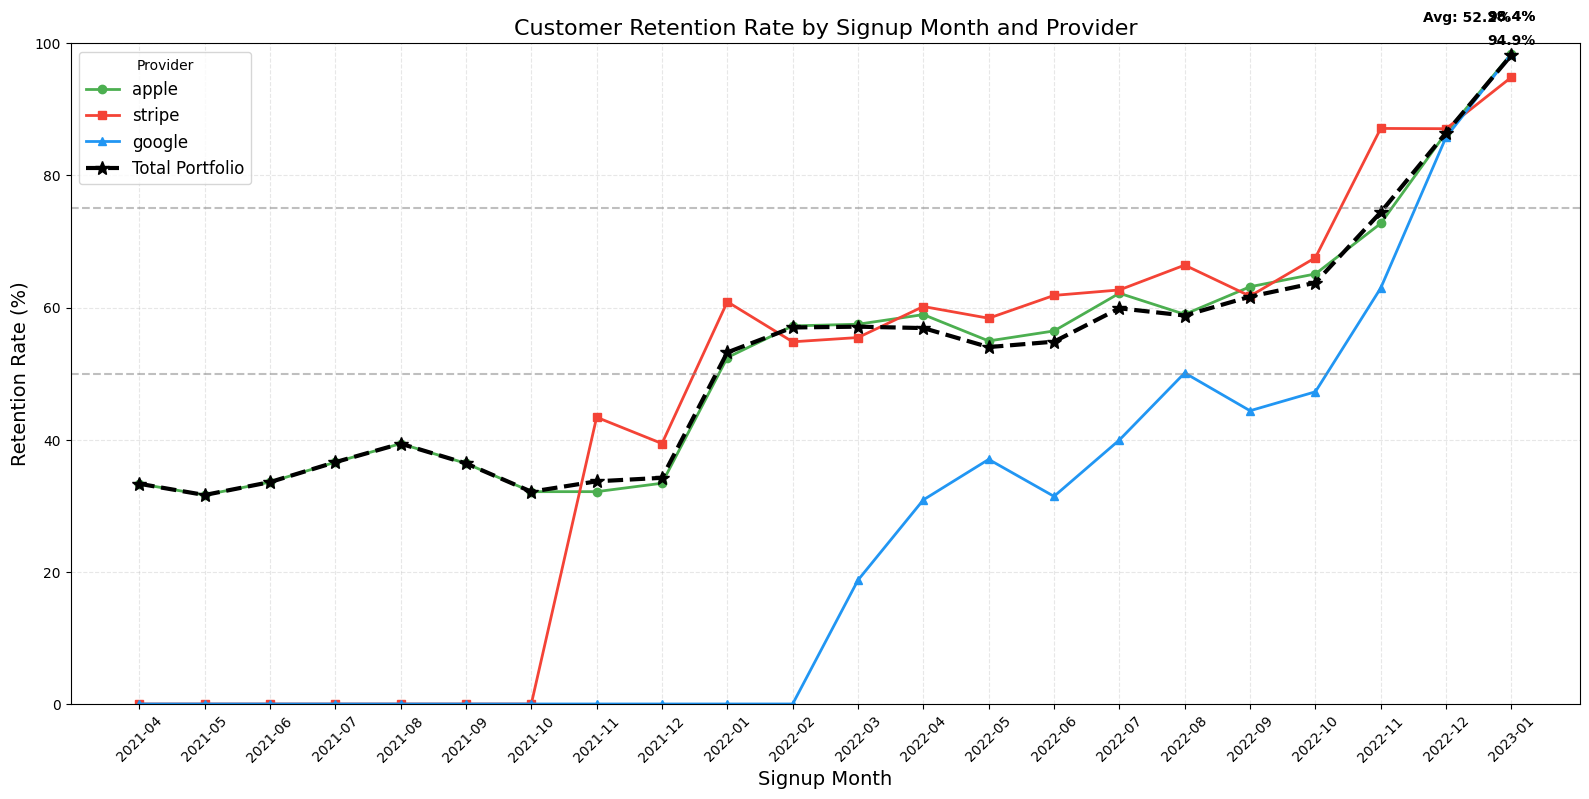

Average Retention Rates by Provider:
apple: 52.4%
stripe: 43.7%
google: 24.9%

Total Portfolio Average Retention: 52.2%


In [117]:
# Create a DataFrame to store retention rates
retention_by_provider = pd.DataFrame(index=monthly_data.index)

# First, add a column to track if customer has conversion date
df_analysis['has_conversion_date'] = df_analysis['conversion_date'].notna()

# Calculate retention rates (active customers / converted customers) by provider and signup month
for provider in df_analysis['provider'].unique():
    provider_data = df_analysis[df_analysis['provider'] == provider]
    
    # Create a series with the retention rate for each month
    retention_series = []
    
    # Iterate through all months in the index to ensure we have data for each month
    for month in retention_by_provider.index:
        # Get data for this provider and month
        month_data = provider_data[provider_data['signup_month'] == month]
        
        # Count converted and active customers
        converted = month_data['has_conversion_date'].sum()
        active = month_data['is_active_base'].sum()
        
        # Calculate retention rate (avoid division by zero)
        retention_rate = (active / converted) * 100 if converted > 0 else 0
        retention_series.append(retention_rate)
    
    # Add to DataFrame
    retention_by_provider[provider] = retention_series

# Calculate the total portfolio retention rate for each month
total_retention = []
for month in retention_by_provider.index:
    # Get data for this month across all providers
    month_data = df_analysis[df_analysis['signup_month'] == month]
    
    # Count total converted and active customers
    total_converted = month_data['has_conversion_date'].sum()
    total_active = month_data['is_active_base'].sum()
    
    # Calculate total retention rate
    total_rate = (total_active / total_converted) * 100 if total_converted > 0 else 0
    total_retention.append(total_rate)

# Add total portfolio retention to the DataFrame
retention_by_provider['Total Portfolio'] = total_retention

# Fill NaN values with 0
retention_by_provider = retention_by_provider.fillna(0)

# Create line chart for retention rates by provider
plt.figure(figsize=(16, 8))

# Use different colors for each provider
colors = ['#4CAF50', '#F44336', '#2196F3']  # Green, Red, Blue for different providers
markers = ['o', 's', '^']  # Circle, Square, Triangle markers

# Plot individual provider lines
for i, provider in enumerate(df_analysis['provider'].unique()):
    if provider in retention_by_provider.columns:
        color_idx = i % len(colors)
        marker_idx = i % len(markers)
        
        plt.plot(range(len(retention_by_provider)), 
                 retention_by_provider[provider], 
                 marker=markers[marker_idx], 
                 color=colors[color_idx],
                 linewidth=2, 
                 label=provider)

# Plot the total portfolio retention as a black dotted line
plt.plot(range(len(retention_by_provider)),
         retention_by_provider['Total Portfolio'],
         color='black',
         linestyle='--',
         linewidth=3,
         marker='*',
         markersize=10,
         label='Total Portfolio')

# Add helper lines at common retention thresholds
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=75, color='gray', linestyle='--', alpha=0.5)

plt.title('Customer Retention Rate by Signup Month and Provider', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.legend(title='Provider', fontsize=12)
plt.xticks(range(len(retention_by_provider)), retention_by_provider.index, rotation=45)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Add annotations for significant points or trends
for provider in df_analysis['provider'].unique():
    if provider in retention_by_provider.columns:
        # Find maximum retention rate for this provider
        max_rate = retention_by_provider[provider].max()
        max_idx = retention_by_provider[provider].idxmax()
        
        if max_rate > 0:  # Only annotate if there's a meaningful maximum
            x_pos = retention_by_provider.index.get_loc(max_idx)
            plt.annotate(f"{max_rate:.1f}%", 
                         xy=(x_pos, max_rate),
                         xytext=(x_pos, max_rate + 5),
                         ha='center',
                         fontweight='bold')

# Also annotate the total portfolio line
# Find average total retention
avg_total = retention_by_provider['Total Portfolio'].mean()
# Add an annotation at the end of the line
plt.annotate(f"Avg: {avg_total:.1f}%",
             xy=(len(retention_by_provider)-1, retention_by_provider['Total Portfolio'].iloc[-1]),
             xytext=(len(retention_by_provider)-1, retention_by_provider['Total Portfolio'].iloc[-1] + 5),
             ha='right',
             fontweight='bold',
             color='black')

plt.show()

# Print average retention rates by provider for additional context
print("Average Retention Rates by Provider:")
for provider in [p for p in retention_by_provider.columns if p != 'Total Portfolio']:
    avg_retention = retention_by_provider[provider].mean()
    print(f"{provider}: {avg_retention:.1f}%")

print(f"\nTotal Portfolio Average Retention: {retention_by_provider['Total Portfolio'].mean():.1f}%")

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/3297930568.py:67: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  retention_matrix = retention_matrix.fillna(0)


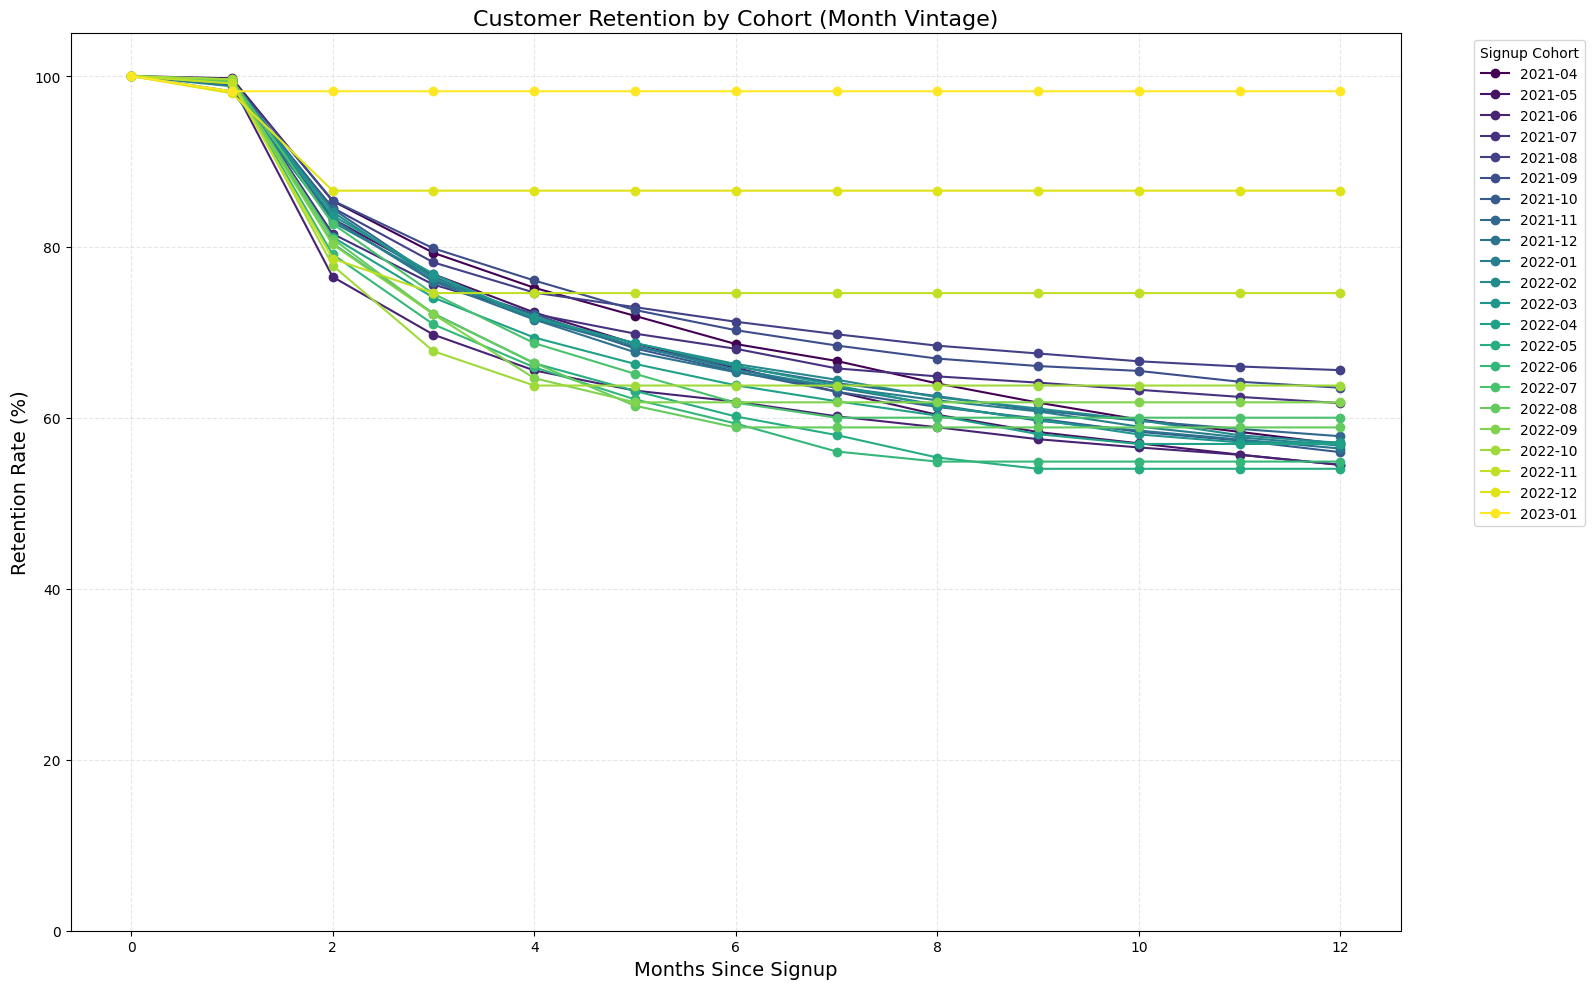

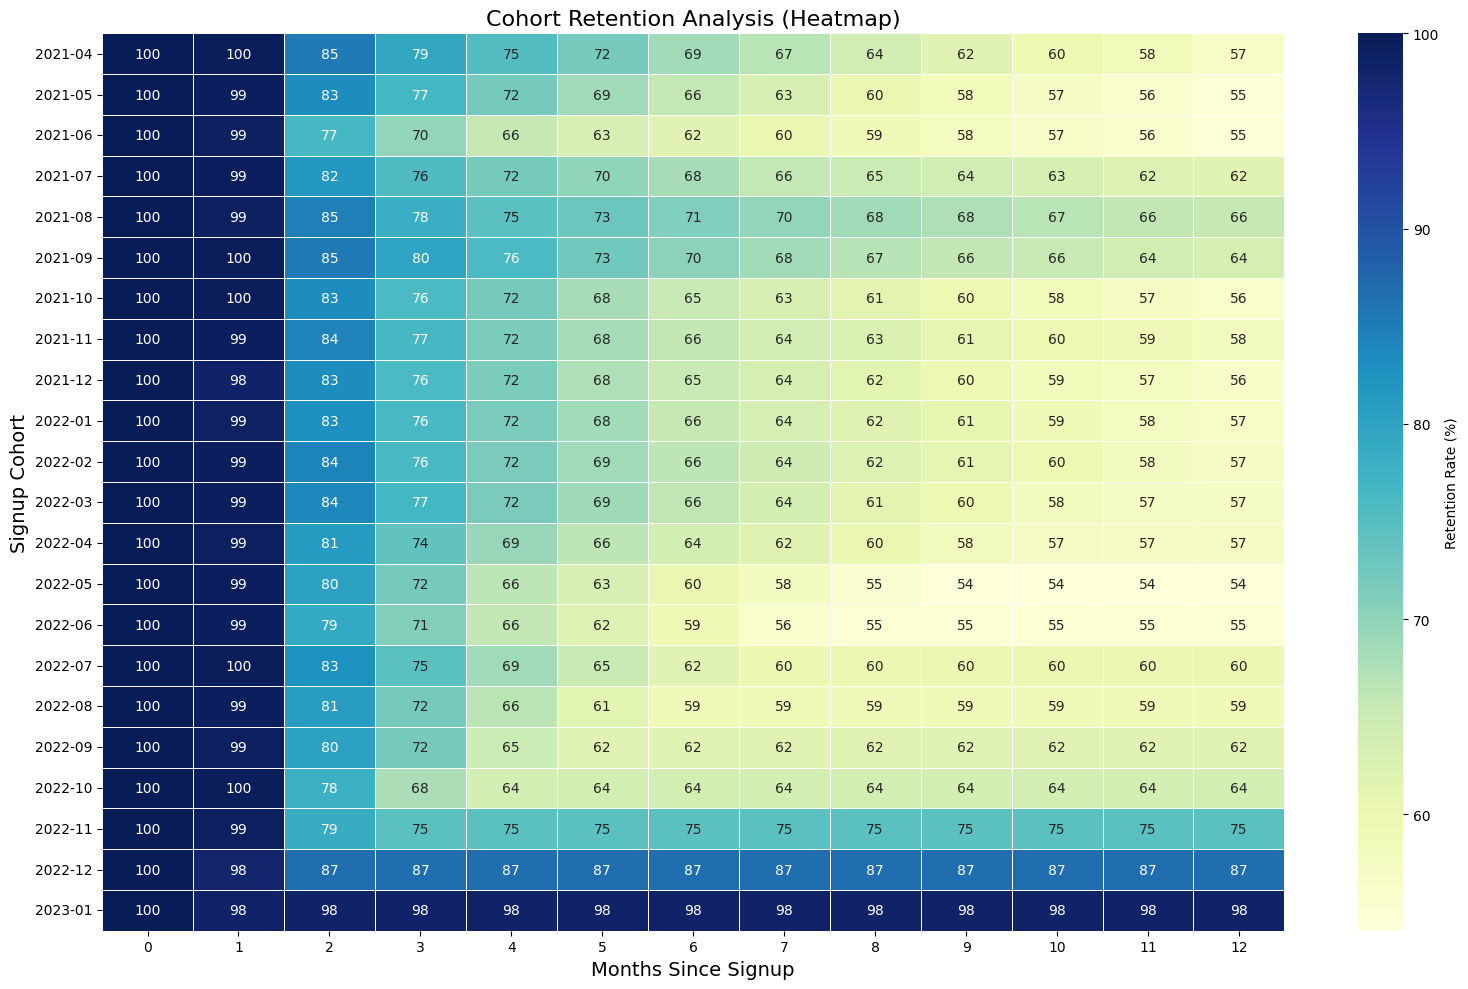

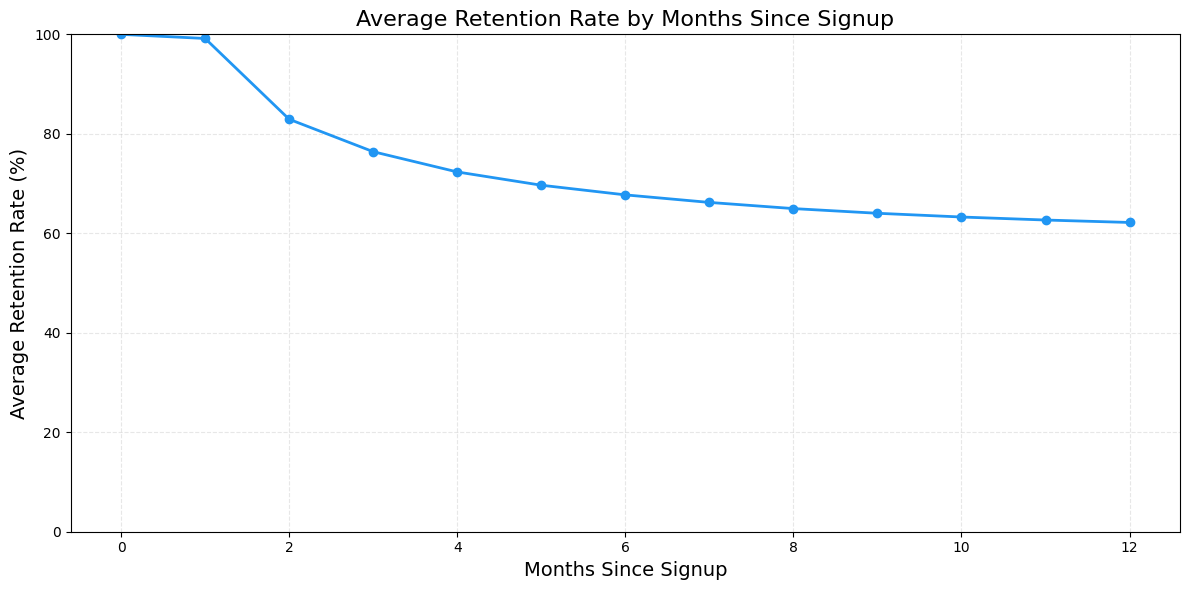

Average retention rates by month since signup:
Month 0: 100.0%
Month 1: 99.2%
Month 2: 82.9%
Month 3: 76.4%
Month 4: 72.3%
Month 5: 69.7%
Month 6: 67.7%
Month 7: 66.2%
Month 8: 65.0%
Month 9: 64.0%
Month 10: 63.3%
Month 11: 62.7%
Month 12: 62.2%

Overall average retention after 3 months: 76.4%
Overall average retention after 6 months: 67.7%
Overall average retention after 12 months: 62.2%


### Below I was trying to devise and average payment per customer to compare to current mrr to see if they are paying more than they have on average or less

In [ ]:
# Add total tenure column representing number of payments made
import pandas as pd
from datetime import datetime

# Create a copy of df3 to work with
df4 = df3.copy()

# Define end date as January 31, 2023
end_date = pd.Timestamp('2023-01-31')

# Ensure cancellation_date is in datetime format (it was converted to date object earlier)
df4['cancellation_date'] = pd.to_datetime(df4['cancellation_date'])

# Calculate tenure in months (representing number of payments made)
def calculate_tenure(row):
    # Skip if no conversion date (never converted)
    if pd.isna(row['conversion_date']):
        return None
    
    # Use cancellation date if customer canceled, otherwise use end date
    if row['is_canceled'] == True and not pd.isna(row['cancellation_date']):
        end = row['cancellation_date']
    else:
        end = end_date
    
    # Calculate basic month difference
    start = row['conversion_date']
    years_diff = end.year - start.year
    months_diff = end.month - start.month
    total_months = years_diff * 12 + months_diff
    
    # # If conversion day is greater than end day, subtract 1 month
    # # This represents that they haven't made a full month's payment in the last month
    if start.day > end.day:
        if start.day == 31 and (end.day == 28 and engor end.day == 30):
            #Edge case
        total_months += 1
    # else: 
    #     total_months += 1
    
    # Ensure we don't have negative tenure
    return max(0, total_months)

# Apply the function to calculate tenure
df4['total_tenure'] = df4.apply(calculate_tenure, axis=1)

# View the results
print("\nSummary statistics for total tenure (in months/payments):")
print(df4['total_tenure'].describe())

# Print sample of data to verify with conversion and cancellation days
print("\nSample of data with total tenure:")
sample_data = df4[['conversion_date', 'cancellation_date', 'is_canceled', 'total_tenure']].sample(10)
# Add day of month columns for easier verification
sample_data['conversion_day'] = sample_data['conversion_date'].dt.day
sample_data['cancellation/end_day'] = sample_data.apply(
    lambda row: row['cancellation_date'].day if pd.notna(row['cancellation_date']) else end_date.day, 
    axis=1
)
print(sample_data)

# Check distribution of tenure values
tenure_counts = df4['total_tenure'].value_counts().sort_index()
print("\nDistribution of tenure values:")
print(tenure_counts.head(20))  # Show first 20 tenure values

# Update your statistics
print("\nUpdated summary statistics with payment-based tenure included:")
print(df4[['total_charges', 'current_mrr', 'total_tenure']].describe())

# Show correlation between tenure and other metrics
print("\nCorrelation between tenure and revenue metrics:")
correlation = df4[['total_charges', 'current_mrr', 'total_tenure']].corr()
print(correlation)


Summary statistics for total tenure (in months/payments):
count    80759.000000
mean         5.144083
std          4.794312
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         21.000000
Name: total_tenure, dtype: float64

Sample of data with total tenure:
       conversion_date cancellation_date is_canceled  total_tenure  \
102632             NaT               NaT       False           NaN   
110028      2022-11-13        2022-12-12        True           1.0   
96652       2022-10-09        2022-11-21        True           1.0   
26481              NaT               NaT       False           NaN   
134200             NaT               NaT       False           NaN   
42205              NaT               NaT       False           NaN   
42088              NaT               NaT       False           NaN   
26852              NaT               NaT       False           NaN   
86088       2022-09-09               NaT       False           4.

In [104]:
df4[df4['total_tenure'] == 0]

,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted,total_tenure
15341,cus_Kdd18tEtcFHtrW,stripe,54.99,2021-11-21,True,False,False,2021-12-05,2021-12-09,0.00,NaN,True,0.0
15706,cus_KdbmLy2MUCyg3U,stripe,0.00,2021-11-21,True,False,False,2021-12-05,2021-12-06,0.00,NaN,True,0.0
15831,cus_KdcReAFO2AMsWZ,stripe,6.99,2021-11-21,True,False,False,2021-11-21,2021-11-23,0.00,NaN,True,0.0
15897,cus_KdguOzeCq4ZelY,stripe,0.00,2021-11-21,True,False,False,2021-12-06,2021-12-14,0.00,NaN,True,0.0
16031,cus_Kdc07FJN9wxWQL,stripe,54.99,2021-11-21,True,False,False,2021-12-05,2021-12-14,0.00,NaN,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134581,cus_NB2ar4wPlZ0Dyw,stripe,7.99,2023-01-16,False,True,False,2023-01-16,NaT,7.99,NaN,True,0.0
134582,cus_NBJnId7BtOqcxV,stripe,7.99,2023-01-16,False,True,False,2023-01-16,NaT,7.99,NaN,True,0.0
134583,cus_NB2xTYQV6peofv,stripe,7.99,2023-01-16,False,True,False,2023-01-16,NaT,7.99,NaN,True,0.0
134589,cus_NBFQqNyxd0qQTU,stripe,7.99,2023-01-16,False,True,False,2023-01-16,NaT,7.99,NaN,True,0.0


In [99]:
df4# Calculate average MRR statistics
import numpy as np

# Average MRR across all customers
average_mrr_all = df3['current_mrr'].mean()

# Average MRR for customers with any MRR (current_mrr > 0)
paying_customers = df3[df3['current_mrr'] > 0]
average_mrr_paying = paying_customers['current_mrr'].mean()

# Average MRR for active customers
active_customers = df3[df3['is_active'] == True]
average_mrr_active = active_customers['current_mrr'].mean()

# Count of customers in each segment
total_customers = len(df3)
paying_count = len(paying_customers)
active_count = len(active_customers)

# Print the results
print(f"Total customers: {total_customers:,}")
print(f"Customers with MRR > 0: {paying_count:,} ({paying_count/total_customers*100:.2f}%)")
print(f"Active customers: {active_count:,} ({active_count/total_customers*100:.2f}%)")
print("\nAverage MRR calculations:")
print(f"Average MRR across all customers: ${average_mrr_all:.2f}")
print(f"Average MRR for customers with any MRR: ${average_mrr_paying:.2f}")
print(f"Average MRR for active customers: ${average_mrr_active:.2f}")

# Calculate median MRR for additional context
median_mrr_all = df3['current_mrr'].median()
median_mrr_paying = paying_customers['current_mrr'].median()
median_mrr_active = active_customers['current_mrr'].median()

print("\nMedian MRR calculations:")
print(f"Median MRR across all customers: ${median_mrr_all:.2f}")
print(f"Median MRR for customers with any MRR: ${median_mrr_paying:.2f}")
print(f"Median MRR for active customers: ${median_mrr_active:.2f}")

Total customers: 134,610
Customers with MRR > 0: 47,069 (34.97%)
Active customers: 47,069 (34.97%)

Average MRR calculations:
Average MRR across all customers: $2.08
Average MRR for customers with any MRR: $5.95
Average MRR for active customers: $5.95

Median MRR calculations:
Median MRR across all customers: $0.00
Median MRR for customers with any MRR: $5.12
Median MRR for active customers: $5.12


In [106]:
# Analyze relationship between conversion dates and total charges
import pandas as pd

# Create a copy of df3 to work with
df_analysis = df3.copy()

# Check for customers with charges but without conversion dates
charges_without_conversion = df_analysis[(df_analysis['total_charges'] > 0) & 
                                       (df_analysis['conversion_date'].isna())]

# Check for customers with conversion dates but no charges
conversion_without_charges = df_analysis[(df_analysis['conversion_date'].notna()) & 
                                       (df_analysis['total_charges'] == 0)]

# Check for customers with current_mrr but no conversion date
mrr_without_conversion = df_analysis[(df_analysis['current_mrr'] > 0) & 
                                   (df_analysis['conversion_date'].isna())]

# Count totals
total_customers = len(df_analysis)
customers_with_charges = (df_analysis['total_charges'] > 0).sum()
customers_with_conversion = df_analysis['conversion_date'].notna().sum()
customers_with_mrr = (df_analysis['current_mrr'] > 0).sum()

# Print the results
print("=== Conversion Date and Total Charges Analysis ===")
print(f"Total customers: {total_customers:,}")
print(f"Customers with total_charges > 0: {customers_with_charges:,} ({customers_with_charges/total_customers*100:.2f}%)")
print(f"Customers with conversion date: {customers_with_conversion:,} ({customers_with_conversion/total_customers*100:.2f}%)")
print(f"Customers with current_mrr > 0: {customers_with_mrr:,} ({customers_with_mrr/total_customers*100:.2f}%)")

print("\n=== Data Integrity Checks ===")
print(f"Customers with total_charges > 0 but NO conversion date: {len(charges_without_conversion):,}")
if len(charges_without_conversion) > 0:
    print("Sample of these customers:")
    print(charges_without_conversion[['oid', 'signup_date', 'total_charges', 
                                     'current_mrr', 'is_active', 'converted']].head(5))

print(f"\nCustomers with conversion date but total_charges = 0: {len(conversion_without_charges):,}")
if len(conversion_without_charges) > 0:
    print("Sample of these customers:")
    print(conversion_without_charges[['oid', 'signup_date', 'conversion_date',
                                     'total_charges', 'current_mrr', 'is_active']].head(5))

print(f"\nCustomers with current_mrr > 0 but NO conversion date: {len(mrr_without_conversion):,}")
if len(mrr_without_conversion) > 0:
    print("Sample of these customers:")
    print(mrr_without_conversion[['oid', 'signup_date', 'total_charges', 
                                 'current_mrr', 'is_active', 'converted']].head(5))

# Create contingency table for total_charges > 0 vs has_conversion_date
df_analysis['has_charges'] = df_analysis['total_charges'] > 0
df_analysis['has_conversion_date'] = df_analysis['conversion_date'].notna()
df_analysis['has_mrr'] = df_analysis['current_mrr'] > 0

contingency = pd.crosstab(df_analysis['has_charges'], df_analysis['has_conversion_date'], 
                         margins=True, normalize='all')
contingency = contingency * 100  # Convert to percentages

print("\n=== Relationship Between Total Charges and Conversion Date ===")
print("Percentage of total customers:")
print(contingency.round(2))

# Distribution of total_charges for customers with and without conversion dates
print("\n=== Total Charges Statistics by Conversion Date Status ===")
with_conversion = df_analysis[df_analysis['has_conversion_date']]['total_charges']
without_conversion = df_analysis[~df_analysis['has_conversion_date']]['total_charges']

print("Customers WITH conversion date:")
print(with_conversion.describe().round(2))
print("\nCustomers WITHOUT conversion date:")
print(without_conversion.describe().round(2))

# Check proportion of customers with total_charges matching expected payments
customers_with_both = df_analysis[(df_analysis['has_charges']) & (df_analysis['has_conversion_date'])]
if len(customers_with_both) > 0:
    # Calculate months since conversion
    end_date = pd.Timestamp('2023-01-31')
    customers_with_both['months_since_conversion'] = ((end_date.year - customers_with_both['conversion_date'].dt.year) * 12 + 
                                                     (end_date.month - customers_with_both['conversion_date'].dt.month))
    # Adjust for active vs. canceled
    customers_with_both.loc[customers_with_both['is_canceled'] == True, 'months_since_conversion'] = (
        (customers_with_both['cancellation_date'].dt.year - customers_with_both['conversion_date'].dt.year) * 12 + 
        (customers_with_both['cancellation_date'].dt.month - customers_with_both['conversion_date'].dt.month)
    )
    
    # Calculate expected total charges based on months and current MRR
    customers_with_both['expected_charges'] = customers_with_both['months_since_conversion'] * customers_with_both['current_mrr']
    customers_with_both['charge_ratio'] = customers_with_both['total_charges'] / customers_with_both['expected_charges']
    
    # Filter to those with current_mrr > 0 to avoid division by zero
    valid_customers = customers_with_both[customers_with_both['current_mrr'] > 0]
    if len(valid_customers) > 0:
        # Check how many customers have total_charges within 20% of expected
        within_expected = ((valid_customers['charge_ratio'] >= 0.8) & 
                           (valid_customers['charge_ratio'] <= 1.2)).mean() * 100
        
        print(f"\n{within_expected:.1f}% of customers have total_charges within 20% of expected")

=== Conversion Date and Total Charges Analysis ===
Total customers: 134,610
Customers with total_charges > 0: 80,216 (59.59%)
Customers with conversion date: 80,759 (59.99%)
Customers with current_mrr > 0: 47,069 (34.97%)

=== Data Integrity Checks ===
Customers with total_charges > 0 but NO conversion date: 731
Sample of these customers:
                   oid signup_date  total_charges  current_mrr is_active  \
8437   462588944443733  2021-09-23          23.42          0.0     False   
9559   259660067920738  2021-10-02           9.91          0.0     False   
13674  203633779480280  2021-11-07           7.99          0.0     False   
14894  161634618669106  2021-11-17           9.64          0.0     False   
14952  574583270019663  2021-11-18           9.38          0.0     False   

      converted  
8437      False  
9559      False  
13674     False  
14894     False  
14952     False  

Customers with conversion date but total_charges = 0: 894
Sample of these customers:
        

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/224060218.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_with_both['months_since_conversion'] = ((end_date.year - customers_with_both['conversion_date'].dt.year) * 12 +


AttributeError: Can only use .dt accessor with datetimelike values

### Heres where I just ask AI on the 4 questions and hope for the best

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/934411027.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  retention_matrix = retention_matrix.fillna(0)


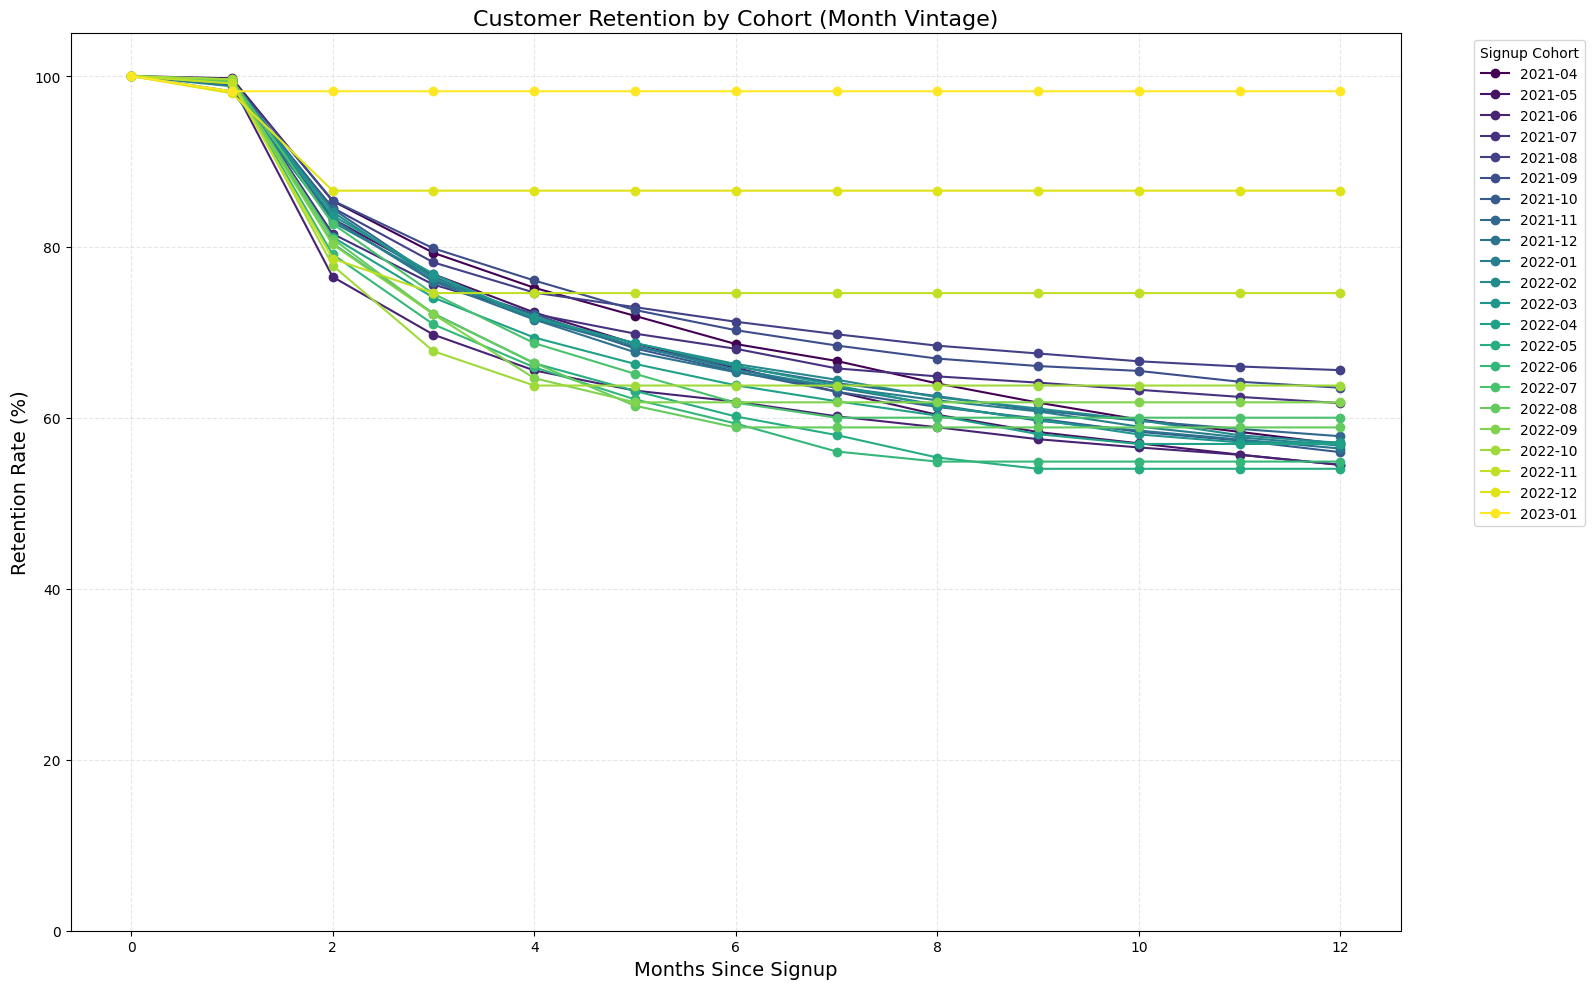

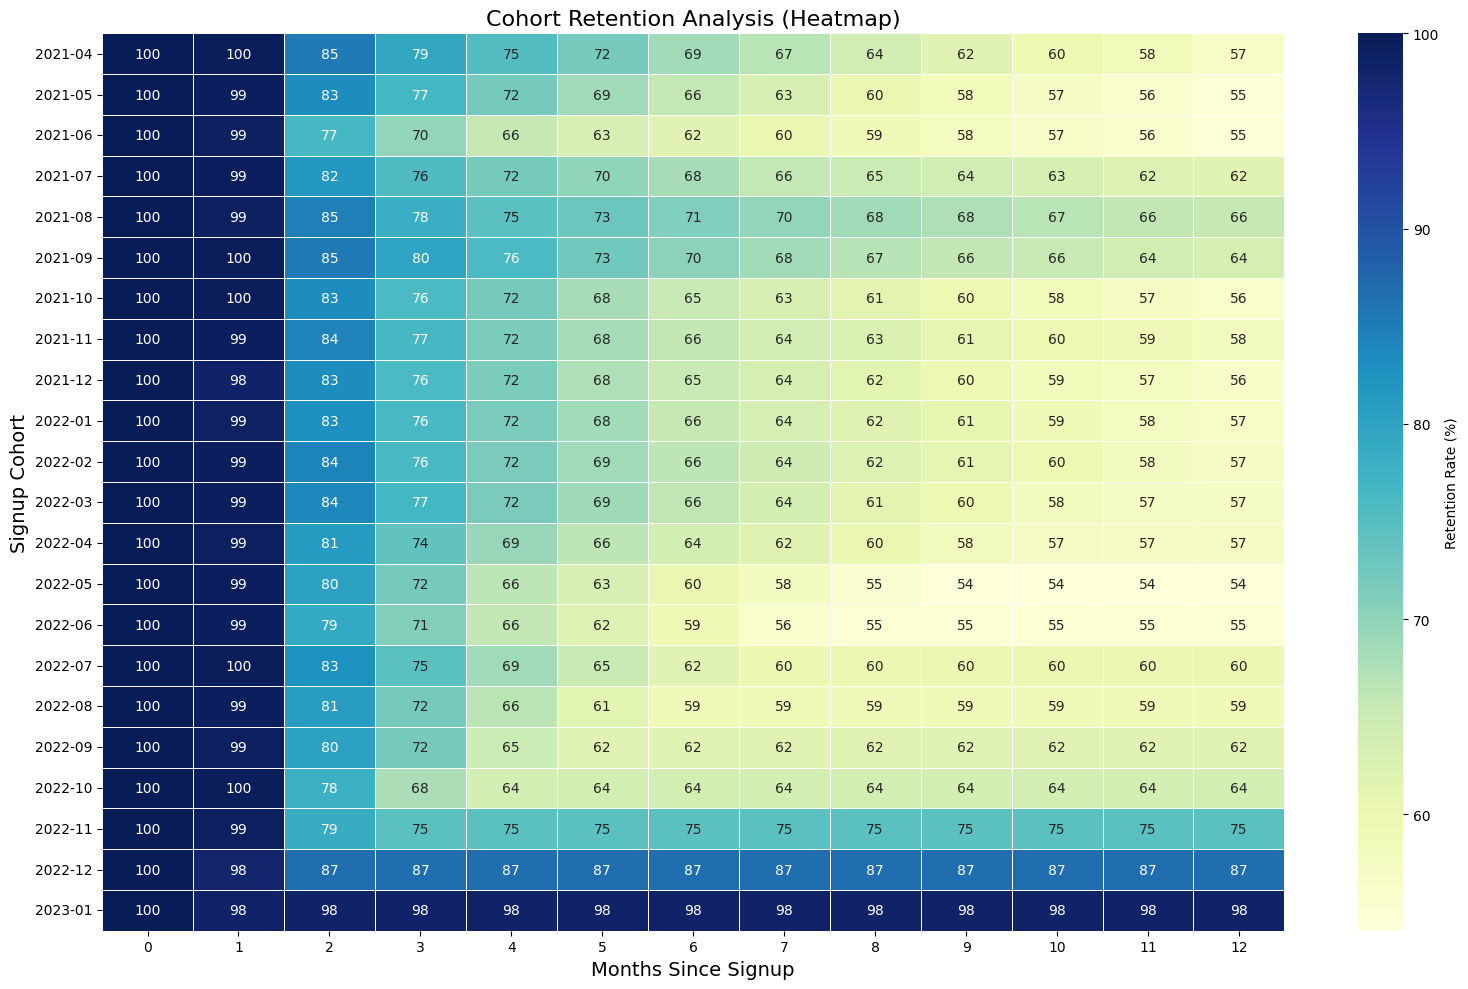

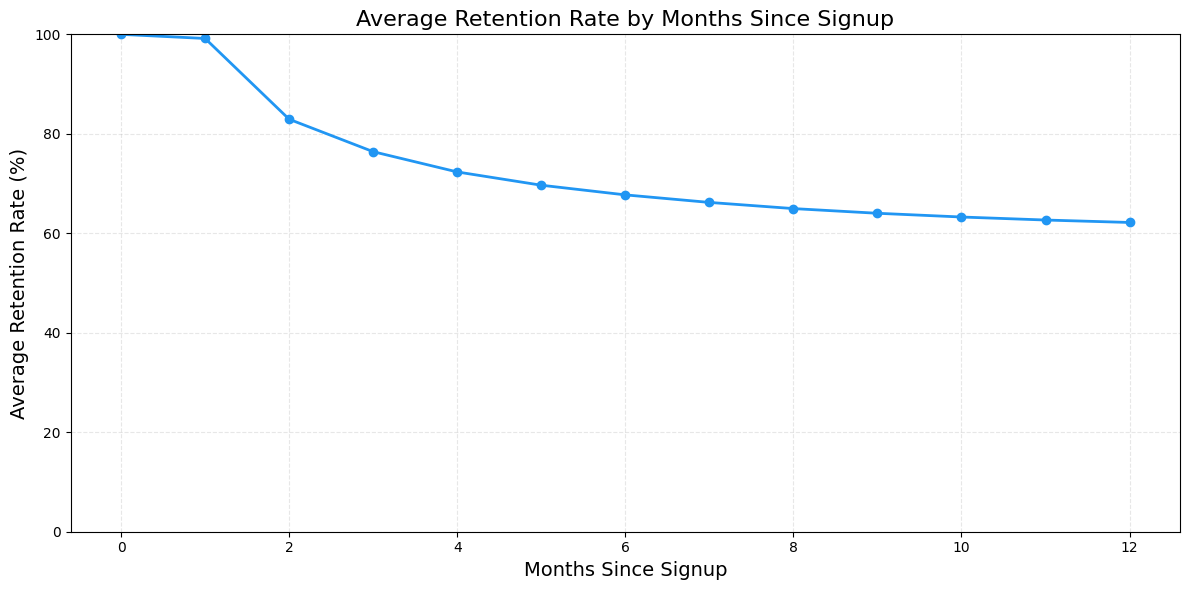

Retention Rate Summary:
1-month retention: 99.2%
3-month retention: 76.4%
6-month retention: 67.7%
12-month retention: 62.2%


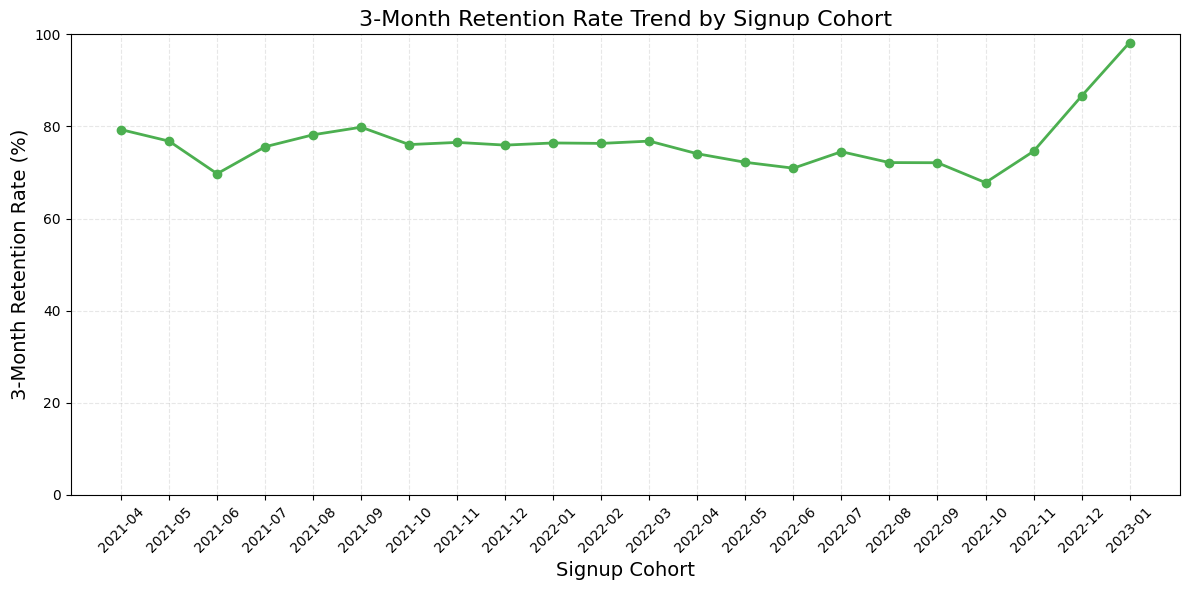


Cohort Trend Analysis:
Average 3-month retention for early cohorts: 76.4%
Average 3-month retention for recent cohorts: 76.4%
Change: -0.1 percentage points
Recent cohorts are performing worse than earlier cohorts.


In [118]:
###############################################################################
# COHORT RETENTION ANALYSIS
# This analysis tracks how well customers from different acquisition periods
# (cohorts) are retained over time.
###############################################################################

# Create a copy of df3 for cohort analysis
df_cohort = df3.copy()

# Add necessary derived columns
df_cohort['is_active_binary'] = df_cohort['is_active'] == True
df_cohort['is_canceled_binary'] = df_cohort['is_canceled'] == True
df_cohort['is_delinquent_binary'] = df_cohort['is_delinquent'] == True
df_cohort['is_active_base'] = df_cohort['is_active_binary'] & ~df_cohort['is_delinquent_binary']
df_cohort['has_conversion_date'] = df_cohort['conversion_date'].notna()

# Define cohort by signup month
df_cohort['cohort'] = df_cohort['signup_date'].dt.to_period('M')

# Filter to only include converted customers for retention analysis
df_simplified = df_cohort[df_cohort['has_conversion_date']].copy()

# Extract all cohorts
cohorts = df_simplified['cohort'].unique()

# Create a retention matrix for cohort analysis
# Rows: signup cohorts, Columns: months since signup (0-12)
retention_matrix = pd.DataFrame(index=cohorts, columns=range(13))

# Calculate the retention rate for each cohort and month
# This is a critical part of understanding how retention evolves over time
for i, cohort in enumerate(cohorts):
    # Get customers who joined in this cohort
    cohort_data = df_simplified[df_simplified['cohort'] == cohort]
    cohort_size = len(cohort_data)
    
    if cohort_size > 0:
        # For each month, calculate retention rate
        for month in range(13):  # 0-12 months
            # Month 0 is always 100% retention (everyone starts retained)
            if month == 0:
                retention_matrix.loc[cohort, month] = 100
                continue
                
            # For other months, calculate based on active status and cancellation date
            active_count = 0
            
            # Determine the date for this retention period
            cohort_date = pd.to_datetime(str(cohort))
            target_date = cohort_date + pd.DateOffset(months=month)
            
            # Count customers still active at this retention milestone
            for _, customer in cohort_data.iterrows():
                # If they're active now, they were active at the target date
                if customer['is_active_binary']:
                    active_count += 1
                # If they're canceled, check if they were still active at the target date
                elif customer['is_canceled_binary'] and not pd.isna(customer['cancellation_date']):
                    if pd.to_datetime(customer['cancellation_date']) >= target_date:
                        active_count += 1
            
            # Calculate retention rate for this month (% of original cohort still active)
            retention_matrix.loc[cohort, month] = (active_count / cohort_size) * 100

# Fill NaN values with 0
retention_matrix = retention_matrix.fillna(0)

# Plot retention curves to visualize cohort trends
plt.figure(figsize=(16, 10))

# Use a colormap to distinguish different cohorts
num_cohorts = len(retention_matrix.index)
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(0, 1, num_cohorts)]

# Plot the retention curve for each cohort
for i, cohort in enumerate(retention_matrix.index):
    cohort_retention = retention_matrix.loc[cohort]
    plt.plot(cohort_retention.index, cohort_retention.values, 
             marker='o', label=str(cohort), color=colors[i % len(colors)])

plt.title('Customer Retention by Cohort (Month Vintage)', fontsize=16)
plt.xlabel('Months Since Signup', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.legend(title='Signup Cohort', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, 105)  # Set y-axis to show 0-100% with a little margin
plt.tight_layout()
plt.show()

# Create a heatmap for easier visualization of many cohorts
plt.figure(figsize=(16, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5, 
            cbar_kws={'label': 'Retention Rate (%)'})
plt.title('Cohort Retention Analysis (Heatmap)', fontsize=16)
plt.xlabel('Months Since Signup', fontsize=14)
plt.ylabel('Signup Cohort', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate average retention by month across all cohorts
# This helps identify the "typical" retention curve for the business
avg_retention_by_month = retention_matrix.mean(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(avg_retention_by_month.index, avg_retention_by_month.values, 
         marker='o', linewidth=2, color='#2196F3')
plt.title('Average Retention Rate by Months Since Signup', fontsize=16)
plt.xlabel('Months Since Signup', fontsize=14)
plt.ylabel('Average Retention Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Print summary retention statistics for management reporting
print("Retention Rate Summary:")
print(f"1-month retention: {avg_retention_by_month[1]:.1f}%")
print(f"3-month retention: {avg_retention_by_month[3]:.1f}%")
print(f"6-month retention: {avg_retention_by_month[6]:.1f}%")
print(f"12-month retention: {avg_retention_by_month[12]:.1f}%" if 12 in avg_retention_by_month else 
      "Not enough data for 12-month retention")

# Calculate retention trend over time by looking at the 3-month retention
# rate for different cohorts
three_month_retention = pd.DataFrame(index=retention_matrix.index)
three_month_retention['3-Month Retention'] = [retention_matrix.loc[cohort, 3] 
                                             if 3 in retention_matrix.columns else np.nan 
                                             for cohort in retention_matrix.index]

# Plot the 3-month retention trend
plt.figure(figsize=(12, 6))
plt.plot(range(len(three_month_retention)), three_month_retention['3-Month Retention'], 
         marker='o', linewidth=2, color='#4CAF50')
plt.title('3-Month Retention Rate Trend by Signup Cohort', fontsize=16)
plt.xlabel('Signup Cohort', fontsize=14)
plt.ylabel('3-Month Retention Rate (%)', fontsize=14)
plt.xticks(range(len(three_month_retention)), three_month_retention.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Calculate if recent cohorts are performing better or worse
# Compare first half vs second half of cohorts
if len(three_month_retention) >= 4:  # Ensure we have enough cohorts to compare
    midpoint = len(three_month_retention) // 2
    early_cohorts = three_month_retention.iloc[:midpoint]
    recent_cohorts = three_month_retention.iloc[midpoint:]
    
    early_avg = early_cohorts['3-Month Retention'].mean()
    recent_avg = recent_cohorts['3-Month Retention'].mean()
    
    print("\nCohort Trend Analysis:")
    print(f"Average 3-month retention for early cohorts: {early_avg:.1f}%")
    print(f"Average 3-month retention for recent cohorts: {recent_avg:.1f}%")
    print(f"Change: {recent_avg - early_avg:.1f} percentage points")
    print(f"Recent cohorts are performing {'better' if recent_avg > early_avg else 'worse'} than earlier cohorts.")

In [ ]:
## The above needs work, I hate it tbh

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/3341817852.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return customer_retention.fillna(0), revenue_retention.fillna(0)


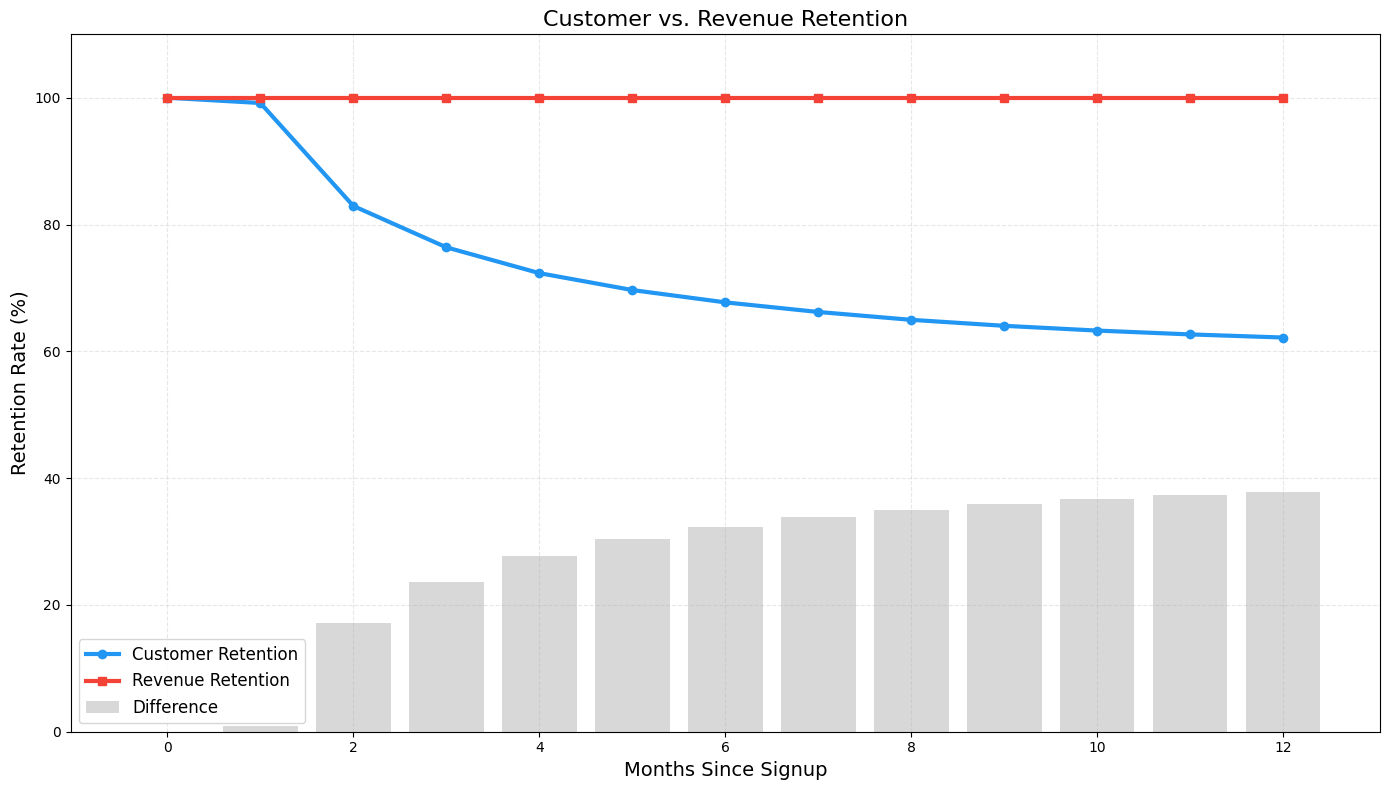

Customer vs. Revenue Retention Comparison:
    Customer Retention  Revenue Retention  Difference (pp)
0                100.0              100.0              0.0
1                 99.2              100.0              0.8
2                 82.9              100.0             17.1
3                 76.4              100.0             23.6
4                 72.3              100.0             27.7
5                 69.7              100.0             30.3
6                 67.7              100.0             32.3
7                 66.2              100.0             33.8
8                 65.0              100.0             35.0
9                 64.0              100.0             36.0
10                63.3              100.0             36.7
11                62.7              100.0             37.3
12                62.2              100.0             37.8

On average, revenue retention is 26.8 percentage points higher than customer retention.
This indicates that higher-value customers

In [119]:
###############################################################################
# CUSTOMER VS REVENUE RETENTION ANALYSIS
# This analysis compares the retention of customers (count) vs. the retention
# of revenue (MRR) to identify if higher-value customers are retained at
# different rates
###############################################################################

# Create a function to calculate both customer and revenue retention
def calculate_dual_retention(data, cohort_column, months=12):
    """
    Calculate both customer retention and revenue retention for cohorts
    
    Parameters:
    data: DataFrame with customer data
    cohort_column: column used for cohort grouping
    months: number of months to analyze
    
    Returns:
    customer_retention, revenue_retention DataFrames
    """
    # Create matrices for both metrics
    cohorts = data[cohort_column].unique()
    customer_retention = pd.DataFrame(index=cohorts, columns=range(months+1))
    revenue_retention = pd.DataFrame(index=cohorts, columns=range(months+1))
    
    # For each cohort
    for cohort in cohorts:
        # Get cohort customers who converted
        cohort_data = data[(data[cohort_column] == cohort) & 
                          (data['has_conversion_date'])]
        
        # Skip empty cohorts
        if len(cohort_data) == 0:
            continue
            
        # Baseline metrics for month 0
        initial_customers = len(cohort_data)
        initial_mrr = cohort_data['current_mrr'].sum()
        
        # Month 0 is always 100%
        customer_retention.loc[cohort, 0] = 100
        revenue_retention.loc[cohort, 0] = 100
        
        # Skip if no revenue
        if initial_mrr == 0:
            continue
            
        # Calculate for each month
        for month in range(1, months+1):
            # Define target date for this retention period
            cohort_date = pd.to_datetime(str(cohort))
            target_date = cohort_date + pd.DateOffset(months=month)
            
            # Count retained customers and their MRR
            retained_customers = 0
            retained_mrr = 0
            
            for _, customer in cohort_data.iterrows():
                # Check if customer was active at target date
                was_active = False
                
                if customer['is_active_binary']:
                    was_active = True
                elif customer['is_canceled_binary'] and not pd.isna(customer['cancellation_date']):
                    if pd.to_datetime(customer['cancellation_date']) >= target_date:
                        was_active = True
                
                if was_active:
                    retained_customers += 1
                    retained_mrr += customer['current_mrr']
            
            # Calculate retention rates
            customer_rate = (retained_customers / initial_customers) * 100
            revenue_rate = (retained_mrr / initial_mrr) * 100
            
            # Store results
            customer_retention.loc[cohort, month] = customer_rate
            revenue_retention.loc[cohort, month] = revenue_rate
    
    return customer_retention.fillna(0), revenue_retention.fillna(0)

# Calculate both customer and revenue retention
customer_retention, revenue_retention = calculate_dual_retention(df_cohort, 'cohort')

# Calculate average retention rates across cohorts
avg_customer_retention = customer_retention.mean(axis=0)
avg_revenue_retention = revenue_retention.mean(axis=0)

# Create a comparison plot
plt.figure(figsize=(14, 8))
plt.plot(avg_customer_retention.index, avg_customer_retention.values, 
         marker='o', linewidth=3, color='#2196F3', label='Customer Retention')
plt.plot(avg_revenue_retention.index, avg_revenue_retention.values, 
         marker='s', linewidth=3, color='#F44336', label='Revenue Retention')

# Calculate and plot the difference
retention_diff = avg_revenue_retention - avg_customer_retention
plt.bar(retention_diff.index, retention_diff.values, alpha=0.3, color='gray', label='Difference')

plt.title('Customer vs. Revenue Retention', fontsize=16)
plt.xlabel('Months Since Signup', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

# Create a table showing the difference
comparison_df = pd.DataFrame({
    'Customer Retention': avg_customer_retention,
    'Revenue Retention': avg_revenue_retention,
    'Difference (pp)': retention_diff
})

print("Customer vs. Revenue Retention Comparison:")
print(comparison_df.round(1))

# Calculate the average difference
avg_diff = retention_diff.mean()
print(f"\nOn average, revenue retention is {avg_diff:.1f} percentage points {'higher' if avg_diff > 0 else 'lower'} than customer retention.")

# Interpret the results
if avg_diff > 5:
    print("This indicates that higher-value customers are retained at a significantly better rate.")
elif avg_diff > 0:
    print("This indicates a slight tendency for higher-value customers to be retained better.")
elif avg_diff < -5:
    print("This indicates that higher-value customers are churning at a significantly higher rate.")
elif avg_diff < 0:
    print("This indicates a slight tendency for higher-value customers to churn more frequently.")
else:
    print("Customer value does not appear to significantly impact retention rates.")

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/871364089.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mrr_matrix = mrr_matrix.fillna(0)


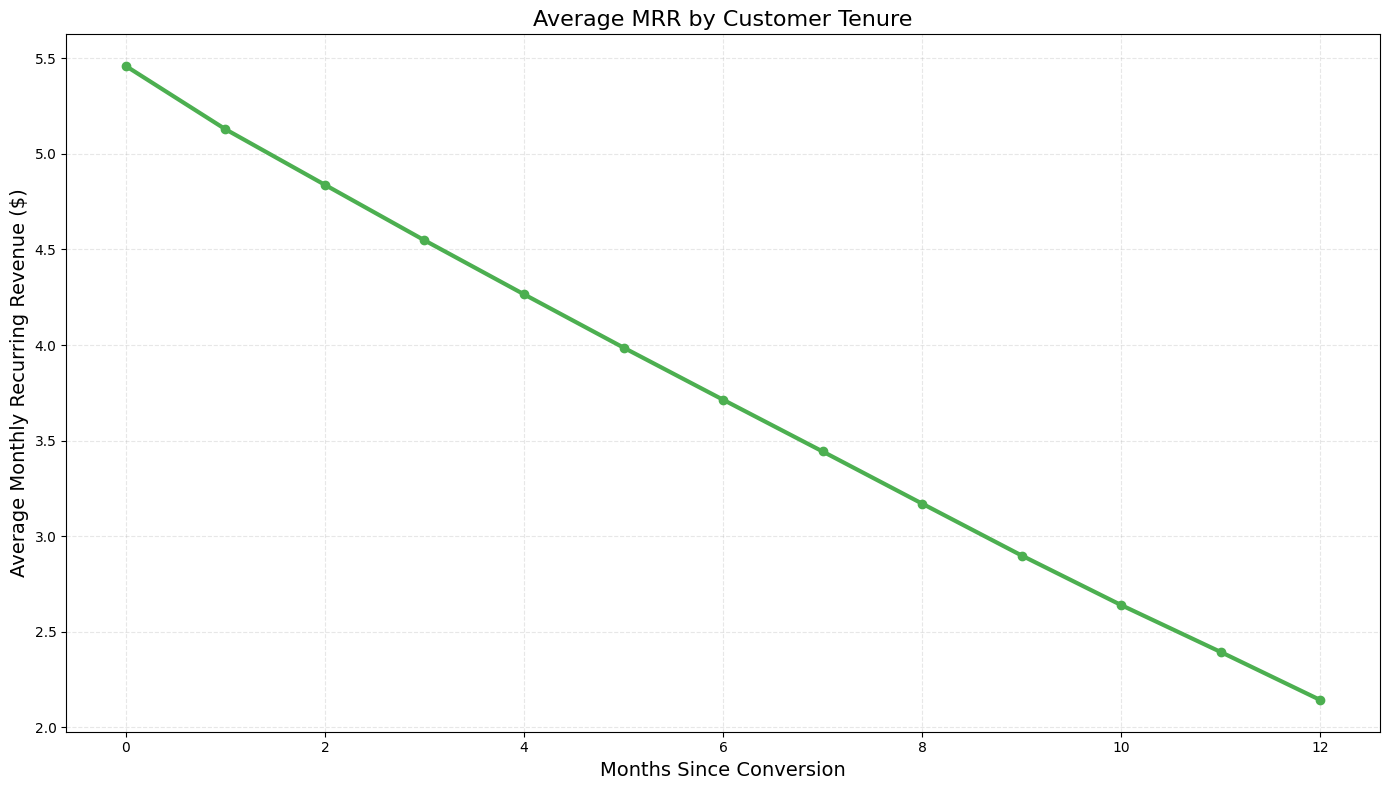

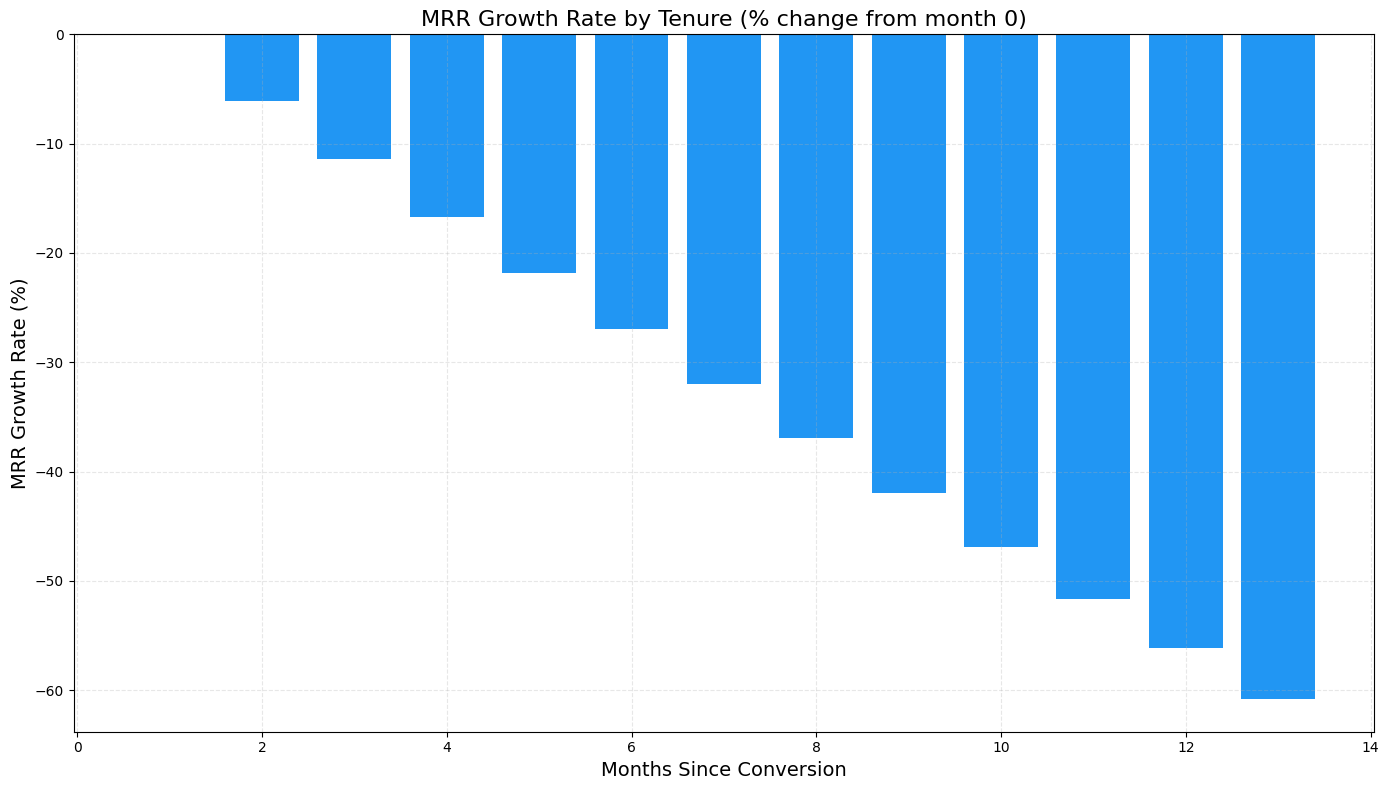

Revenue Expansion Analysis:
Initial average MRR: $5.46
Final average MRR (month 12): $2.14
Overall MRR growth: -60.8%
Annualized MRR growth rate: -60.8%

Insight: Evidence of revenue contraction at the customer level.
Customers tend to reduce their spending over time, which is concerning.


In [122]:
###############################################################################
# REVENUE EXPANSION ANALYSIS
# This analysis examines whether customers increase their spending over time,
# which is a key driver of growth in subscription businesses
###############################################################################

# Create a copy of df3 for revenue expansion analysis
df_revenue = df3.copy()

# Ensure we have conversion date and other necessary columns
df_revenue['has_conversion_date'] = df_revenue['conversion_date'].notna()
df_revenue['is_active_binary'] = df_revenue['is_active'] == True

# Add signup_month column BEFORE filtering
df_revenue['signup_month'] = df_revenue['signup_date'].dt.to_period('M')

# Filter to customers who converted and are still active
active_customers = df_revenue[(df_revenue['has_conversion_date']) & 
                             (df_revenue['is_active_binary'])].copy()

# Calculate months since conversion for each customer
current_date = pd.Timestamp('2023-01-31')  # Reference date for analysis
active_customers['months_since_conversion'] = ((current_date.year - active_customers['conversion_date'].dt.year) * 12 + 
                                             (current_date.month - active_customers['conversion_date'].dt.month))

# Group customers by tenure (months since conversion)
tenure_mrr = active_customers.groupby('months_since_conversion')['current_mrr'].mean()

# Calculate cohort MRR over time
# For this, we need to create a matrix similar to retention, but tracking MRR
cohorts = active_customers['signup_month'].unique()
mrr_matrix = pd.DataFrame(index=cohorts, columns=range(13))  # 0-12 months

# For each cohort and month, calculate the average MRR of active customers
for cohort in cohorts:
    cohort_customers = active_customers[active_customers['signup_month'] == cohort]
    
    for month in range(13):  # 0-12 months
        # Filter to customers with at least this tenure
        tenured_customers = cohort_customers[cohort_customers['months_since_conversion'] >= month]
        
        if len(tenured_customers) > 0:
            avg_mrr = tenured_customers['current_mrr'].mean()
            mrr_matrix.loc[cohort, month] = avg_mrr

# Fill NaN values with 0
mrr_matrix = mrr_matrix.fillna(0)

# Calculate the average MRR by tenure across all cohorts
avg_mrr_by_tenure = mrr_matrix.mean(axis=0)

# Create a visualization of MRR expansion
plt.figure(figsize=(14, 8))
plt.plot(avg_mrr_by_tenure.index, avg_mrr_by_tenure.values, 
         marker='o', linewidth=3, color='#4CAF50')

plt.title('Average MRR by Customer Tenure', fontsize=16)
plt.xlabel('Months Since Conversion', fontsize=14)
plt.ylabel('Average Monthly Recurring Revenue ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate MRR growth rate
initial_mrr = avg_mrr_by_tenure[0]
mrr_growth = []

for month, mrr in avg_mrr_by_tenure.items():
    if initial_mrr > 0 and month > 0:
        growth_rate = ((mrr / initial_mrr) - 1) * 100
    else:
        growth_rate = 0
    mrr_growth.append(growth_rate)

# Plot MRR growth rates
plt.figure(figsize=(14, 8))
plt.bar(range(1, len(mrr_growth)+1), mrr_growth, color='#2196F3')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.title('MRR Growth Rate by Tenure (% change from month 0)', fontsize=16)
plt.xlabel('Months Since Conversion', fontsize=14)
plt.ylabel('MRR Growth Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate overall MRR growth from first to last month
if len(avg_mrr_by_tenure) > 1:
    first_month_mrr = avg_mrr_by_tenure[0]
    last_month_mrr = avg_mrr_by_tenure[max(avg_mrr_by_tenure.index)]
    total_growth_rate = ((last_month_mrr / first_month_mrr) - 1) * 100 if first_month_mrr > 0 else 0
    
    print("Revenue Expansion Analysis:")
    print(f"Initial average MRR: ${first_month_mrr:.2f}")
    print(f"Final average MRR (month {max(avg_mrr_by_tenure.index)}): ${last_month_mrr:.2f}")
    print(f"Overall MRR growth: {total_growth_rate:.1f}%")
    
    # Annualized growth rate
    months = max(avg_mrr_by_tenure.index)
    annual_growth_rate = ((1 + total_growth_rate/100) ** (12/months) - 1) * 100 if months > 0 else 0
    print(f"Annualized MRR growth rate: {annual_growth_rate:.1f}%")
    
    # Interpret the results
    if total_growth_rate > 10:
        print("\nInsight: Strong evidence of revenue expansion at the customer level.")
        print("Customers significantly increase their spending over time, supporting a 'land and expand' strategy.")
    elif total_growth_rate > 0:
        print("\nInsight: Moderate evidence of revenue expansion at the customer level.")
        print("Customers show some increase in spending over time, but the effect is modest.")
    elif total_growth_rate > -5:
        print("\nInsight: No clear evidence of revenue expansion at the customer level.")
        print("Customer spending remains relatively flat over time.")
    else:
        print("\nInsight: Evidence of revenue contraction at the customer level.")
        print("Customers tend to reduce their spending over time, which is concerning.")

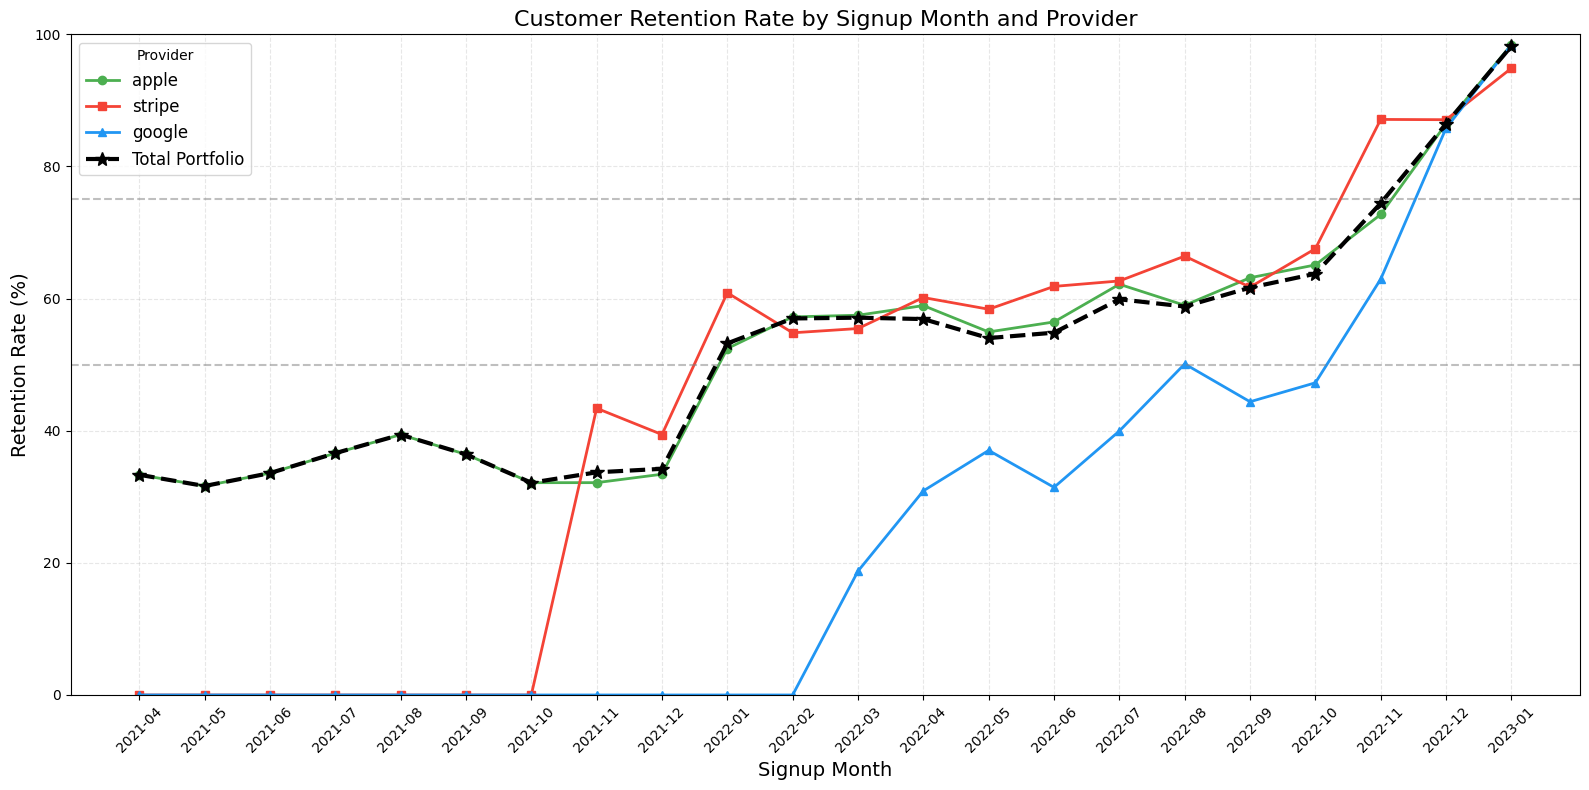

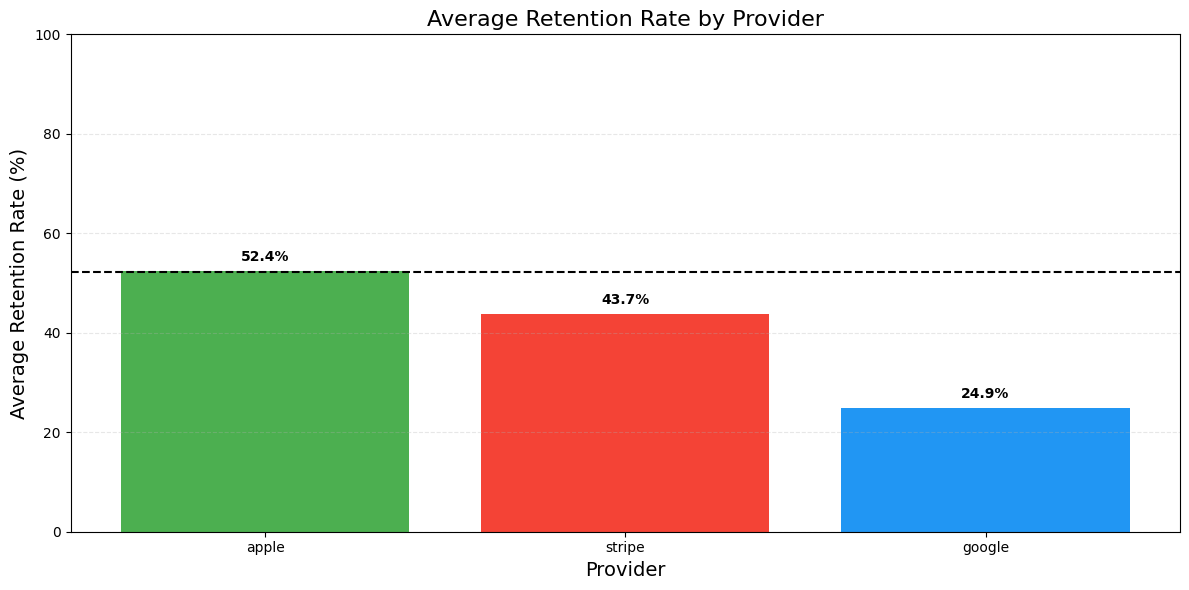

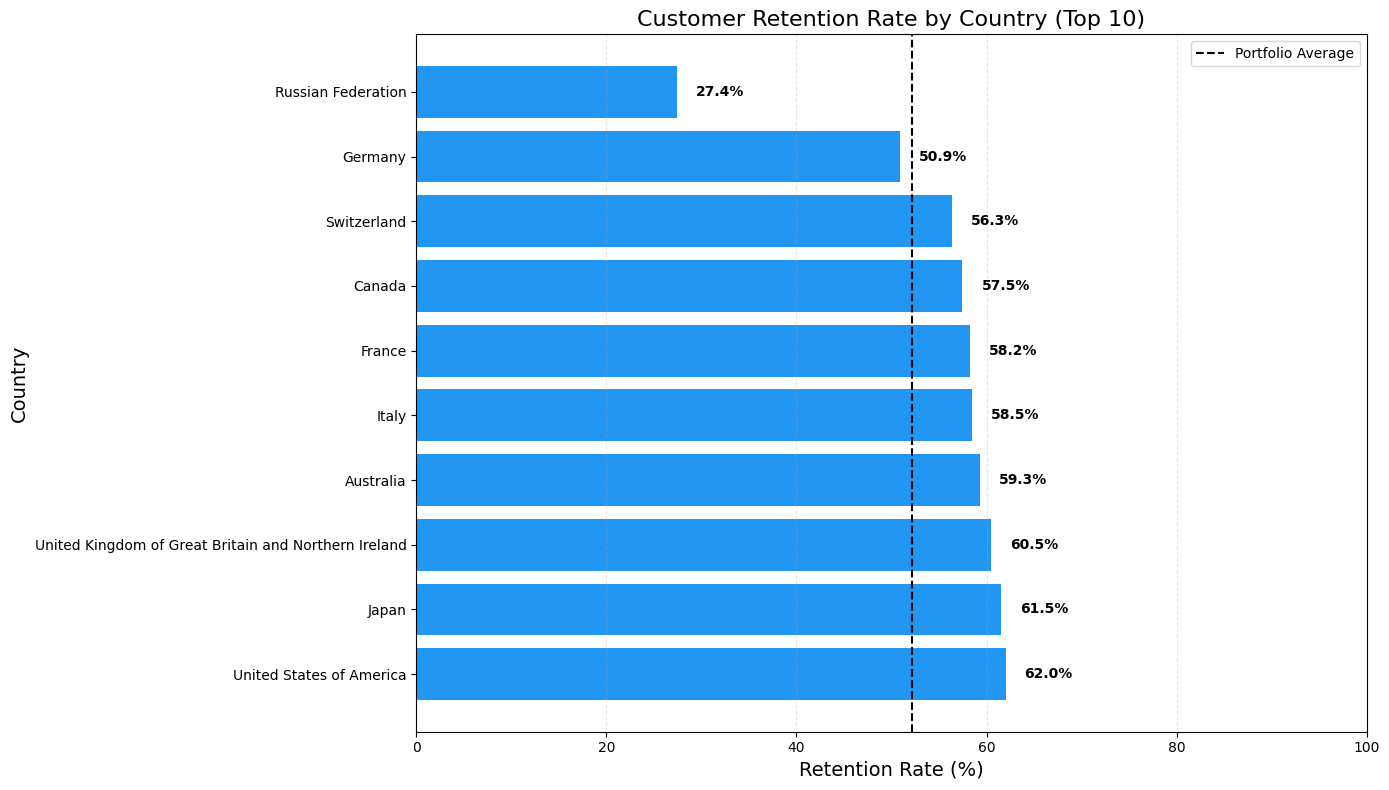

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_30290/3825738408.py:199: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  retention_matrix = retention_matrix.fillna(0)


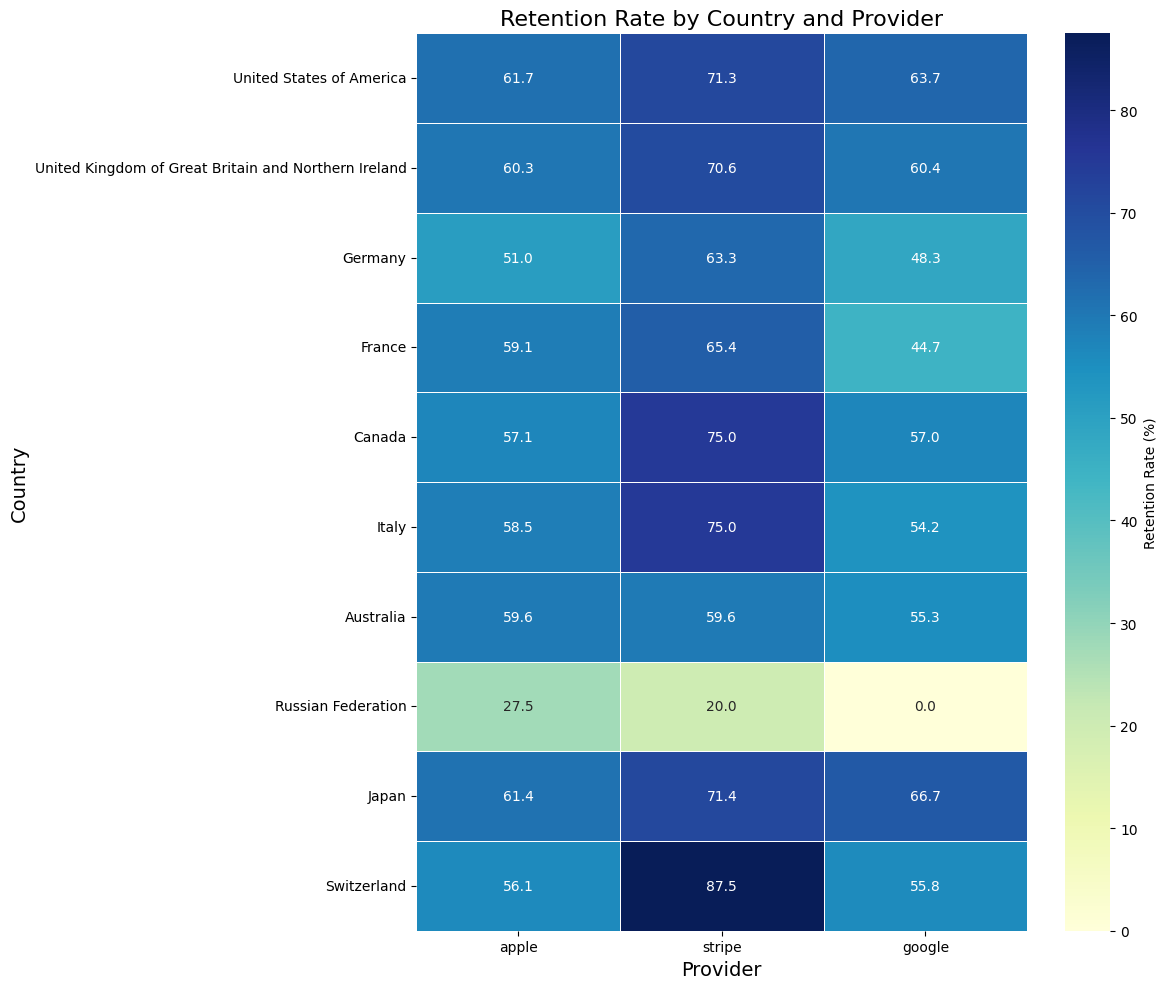

Provider Retention Analysis:
apple: 40.7% retention across 98,026 customers
stripe: 14.8% retention across 32,108 customers
google: 52.0% retention across 4,476 customers

Geographic Retention Insights:
Highest retention: United States of America (62.0%)
Lowest retention: Russian Federation (27.4%)
Retention gap: 34.6 percentage points

Key Takeaways for Management:
1. Provider Analysis:
   - apple shows the highest retention (52.4%)
   - google shows the lowest retention (24.9%)

2. Geographic Analysis:
   - United States of America has the strongest customer retention
   - Russian Federation has the weakest customer retention
   - Consider tailoring retention strategies by region

3. Combined Provider/Geography:
   - Best combination: Switzerland with stripe (87.5% retention)
   - Worst combination: Russian Federation with stripe (20.0% retention)
   - Consider targeted interventions for underperforming segments


In [121]:
###############################################################################
# RETENTION ANALYSIS BY GEOGRAPHY AND PROVIDER
# This analysis segments retention rates by key dimensions to identify 
# variations across different customer groups
###############################################################################

# Create a copy of df3 for segmentation analysis
df_segments = df3.copy()

# Add necessary derived columns if they don't exist
if 'is_active_base' not in df_segments.columns:
    df_segments['is_active_binary'] = df_segments['is_active'] == True
    df_segments['is_delinquent_binary'] = df_segments['is_delinquent'] == True
    df_segments['is_active_base'] = df_segments['is_active_binary'] & ~df_segments['is_delinquent_binary']

if 'has_conversion_date' not in df_segments.columns:
    df_segments['has_conversion_date'] = df_segments['conversion_date'].notna()

if 'signup_month' not in df_segments.columns:
    df_segments['signup_month'] = df_segments['signup_date'].dt.to_period('M')

# 1. Retention by Provider
# Create a DataFrame to store retention rates by provider
retention_by_provider = pd.DataFrame(index=df_segments['signup_month'].unique())

# Calculate retention rates by provider
for provider in df_segments['provider'].unique():
    provider_data = df_segments[df_segments['provider'] == provider]
    
    # Calculate retention for each signup month
    retention_rates = []
    for month in retention_by_provider.index:
        month_data = provider_data[provider_data['signup_month'] == month]
        
        # Count converted and active customers
        converted = month_data['has_conversion_date'].sum()
        active = month_data['is_active_base'].sum()
        
        # Calculate retention rate
        retention_rate = (active / converted) * 100 if converted > 0 else 0
        retention_rates.append(retention_rate)
    
    # Add to DataFrame
    retention_by_provider[provider] = retention_rates

# Calculate total portfolio retention
total_retention = []
for month in retention_by_provider.index:
    month_data = df_segments[df_segments['signup_month'] == month]
    
    # Count total converted and active customers
    total_converted = month_data['has_conversion_date'].sum()
    total_active = month_data['is_active_base'].sum()
    
    # Calculate total retention rate
    total_rate = (total_active / total_converted) * 100 if total_converted > 0 else 0
    total_retention.append(total_rate)

# Add total portfolio retention to the DataFrame
retention_by_provider['Total Portfolio'] = total_retention

# Fill NaN values with 0
retention_by_provider = retention_by_provider.fillna(0)

# Plot retention rates by provider
plt.figure(figsize=(16, 8))

# Use different colors for each provider
colors = ['#4CAF50', '#F44336', '#2196F3']  # Green, Red, Blue
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Plot provider lines
for i, provider in enumerate(df_segments['provider'].unique()):
    if provider in retention_by_provider.columns:
        color_idx = i % len(colors)
        marker_idx = i % len(markers)
        
        plt.plot(range(len(retention_by_provider)), 
                 retention_by_provider[provider], 
                 marker=markers[marker_idx], 
                 color=colors[color_idx],
                 linewidth=2, 
                 label=provider)

# Plot total portfolio retention
plt.plot(range(len(retention_by_provider)),
         retention_by_provider['Total Portfolio'],
         color='black',
         linestyle='--',
         linewidth=3,
         marker='*',
         markersize=10,
         label='Total Portfolio')

# Add visual elements
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=75, color='gray', linestyle='--', alpha=0.5)

plt.title('Customer Retention Rate by Signup Month and Provider', fontsize=16)
plt.xlabel('Signup Month', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.legend(title='Provider', fontsize=12)
plt.xticks(range(len(retention_by_provider)), retention_by_provider.index, rotation=45)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate average retention by provider
avg_retention_by_provider = {}
for provider in retention_by_provider.columns:
    avg_retention_by_provider[provider] = retention_by_provider[provider].mean()

# Plot average retention by provider
plt.figure(figsize=(12, 6))
providers = [p for p in avg_retention_by_provider.keys() if p != 'Total Portfolio']
avg_rates = [avg_retention_by_provider[p] for p in providers]

# Create bar chart
plt.bar(providers, avg_rates, color=colors[:len(providers)])
plt.axhline(y=avg_retention_by_provider['Total Portfolio'], 
           color='black', linestyle='--', label='Portfolio Average')

plt.title('Average Retention Rate by Provider', fontsize=16)
plt.xlabel('Provider', fontsize=14)
plt.ylabel('Average Retention Rate (%)', fontsize=14)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add retention rate labels
for i, rate in enumerate(avg_rates):
    plt.text(i, rate + 2, f"{rate:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Retention by Geography (Top 10 Countries)
# Identify top countries by customer count
top_countries = df_segments['personal_person_geo_country'].value_counts().head(10).index

# Calculate retention by country
retention_by_country = {}
for country in top_countries:
    country_data = df_segments[df_segments['personal_person_geo_country'] == country]
    
    # Calculate overall retention for this country
    converted = country_data['has_conversion_date'].sum()
    active = country_data['is_active_base'].sum()
    
    retention_rate = (active / converted) * 100 if converted > 0 else 0
    retention_by_country[country] = retention_rate

# Sort by retention rate
retention_by_country = {k: v for k, v in sorted(retention_by_country.items(), 
                                              key=lambda item: item[1], reverse=True)}

# Plot retention by country
plt.figure(figsize=(14, 8))
countries = list(retention_by_country.keys())
rates = list(retention_by_country.values())

# Create horizontal bar chart for better country name display
plt.barh(countries, rates, color='#2196F3')
plt.axvline(x=avg_retention_by_provider['Total Portfolio'], 
           color='black', linestyle='--', label='Portfolio Average')

plt.title('Customer Retention Rate by Country (Top 10)', fontsize=16)
plt.xlabel('Retention Rate (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend()

# Add retention rate labels
for i, rate in enumerate(rates):
    plt.text(rate + 2, i, f"{rate:.1f}%", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Combine Provider and Geography
# Calculate retention matrix for top countries and providers
retention_matrix = pd.DataFrame(index=top_countries, columns=df_segments['provider'].unique())

for country in top_countries:
    country_data = df_segments[df_segments['personal_person_geo_country'] == country]
    
    for provider in df_segments['provider'].unique():
        segment_data = country_data[country_data['provider'] == provider]
        
        # Calculate retention
        converted = segment_data['has_conversion_date'].sum()
        active = segment_data['is_active_base'].sum()
        
        retention_rate = (active / converted) * 100 if converted > 0 else 0
        retention_matrix.loc[country, provider] = retention_rate

# Fill NaN values with 0
retention_matrix = retention_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, 
            cbar_kws={'label': 'Retention Rate (%)'})
plt.title('Retention Rate by Country and Provider', fontsize=16)
plt.xlabel('Provider', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate statistical significance
# Determine if differences in retention by provider are statistically significant
print("Provider Retention Analysis:")
for provider in df_segments['provider'].unique():
    provider_data = df_segments[df_segments['provider'] == provider]
    provider_retention = provider_data['is_active_base'].mean() * 100
    provider_customers = len(provider_data)
    
    print(f"{provider}: {provider_retention:.1f}% retention across {provider_customers:,} customers")

# Compare top and bottom countries
top_country = list(retention_by_country.keys())[0]
bottom_country = list(retention_by_country.keys())[-1]
top_rate = retention_by_country[top_country]
bottom_rate = retention_by_country[bottom_country]

print("\nGeographic Retention Insights:")
print(f"Highest retention: {top_country} ({top_rate:.1f}%)")
print(f"Lowest retention: {bottom_country} ({bottom_rate:.1f}%)")
print(f"Retention gap: {top_rate - bottom_rate:.1f} percentage points")

# Provide insights for management
print("\nKey Takeaways for Management:")
print("1. Provider Analysis:")
providers_sorted = sorted([(p, avg_retention_by_provider[p]) for p in providers], 
                         key=lambda x: x[1], reverse=True)
best_provider = providers_sorted[0][0]
worst_provider = providers_sorted[-1][0]
print(f"   - {best_provider} shows the highest retention ({providers_sorted[0][1]:.1f}%)")
print(f"   - {worst_provider} shows the lowest retention ({providers_sorted[-1][1]:.1f}%)")

print("\n2. Geographic Analysis:")
print(f"   - {top_country} has the strongest customer retention")
print(f"   - {bottom_country} has the weakest customer retention")
print("   - Consider tailoring retention strategies by region")

print("\n3. Combined Provider/Geography:")
# Find best and worst combinations
max_val = retention_matrix.max().max()
min_val = retention_matrix[retention_matrix > 0].min().min()  # Exclude zeros
max_idx = retention_matrix.stack().idxmax()
min_idx = retention_matrix[retention_matrix > 0].stack().idxmin()

print(f"   - Best combination: {max_idx[0]} with {max_idx[1]} ({max_val:.1f}% retention)")
print(f"   - Worst combination: {min_idx[0]} with {min_idx[1]} ({min_val:.1f}% retention)")
print("   - Consider targeted interventions for underperforming segments")